# DECISION TREE AND RANDOM FOREST MODEL

IMPORTANT NOTES
orginal data set = 5133*206

# LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statsmodels.formula.api as smf
import scipy.stats as stats


from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [2]:

df = pd.read_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\10 min interval data -2018\July-august 2018.xlsx')
df.columns

Index(['Date', 'Channelling', 'Hot_Blast_Vol', 'Hot_Blast_Press', 'FTP',
       'Steam_Inj', 'Oxygen_Flow', 'Blast_Moist', 'Coal_Inj', 'Coal_Actual',
       ...
       'BA1_KU_PT530_NM', 'BA1_KU_PT531_NM', 'BA1_KU_PT532_NM',
       'BA1_KU_PT533_NM', 'BA1_KU_PT534_NM', 'BA1_KU_PT535_NM',
       'BA1_KU_PT536_NM', 'BA1_KU_PT537_NM', 'BA1_KU_PT538_NM',
       'BA1_KU_PT539_NM'],
      dtype='object', length=198)

In [3]:
df.shape

(8784, 198)

# Count of channeling and non channeling

In [4]:
df.groupby("Channelling").describe().T.round()

Channelling                   0         1
Hot_Blast_Vol   count    5844.0    2940.0
                mean   337645.0  331017.0
                std     82473.0   36889.0
                min         0.0  147039.0
                25%    345501.0  321504.0
...                         ...       ...
BA1_KU_PT539_NM min         0.0       1.0
                25%         2.0       2.0
                50%         2.0       2.0
                75%         2.0       2.0
                max         3.0       3.0

[1360 rows x 2 columns]

# Outlier treatment 


In [5]:
df

,Date,Channelling,Hot_Blast_Vol,Hot_Blast_Press,FTP,Steam_Inj,Oxygen_Flow,Blast_Moist,Coal_Inj,Coal_Actual,...,BA1_KU_PT530_NM,BA1_KU_PT531_NM,BA1_KU_PT532_NM,BA1_KU_PT533_NM,BA1_KU_PT534_NM,BA1_KU_PT535_NM,BA1_KU_PT536_NM,BA1_KU_PT537_NM,BA1_KU_PT538_NM,BA1_KU_PT539_NM
0,2018-06-01 00:00:00,0,291314.141460,2.358719,1.305764,1.794598,0.000000,25.167840,0.0,0.000000,...,0.844990,1.678695,1.803070,1.799170,1.811193,1.887992,1.906393,1.861300,1.912253,1.856443
1,2018-06-01 00:10:00,0,296994.243475,2.465952,1.308096,1.792718,0.000000,25.040695,0.0,0.000000,...,0.926836,1.689639,1.870033,1.864194,1.884448,1.956843,2.102317,1.955040,2.016837,2.128043
2,2018-06-01 00:20:00,0,327925.318529,2.829154,1.589956,3.948594,0.000000,30.918612,0.0,0.000000,...,1.010383,2.002039,2.192265,2.179730,2.227565,2.253307,2.290551,2.254453,2.287695,2.238155
3,2018-06-01 00:30:00,0,334864.588813,2.947168,1.671134,5.225084,0.000000,34.702425,0.0,0.000000,...,1.118954,2.111779,2.294494,2.278628,2.286134,2.343890,2.508995,2.379457,2.412233,2.518960
4,2018-06-01 00:40:00,0,336993.350112,2.956800,1.667515,7.238677,492.171920,40.468882,0.0,0.000000,...,1.208795,2.133903,2.291999,2.289191,2.275220,2.355010,2.400072,2.372695,2.409504,2.356896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2018-07-31 23:10:00,0,380426.550979,3.273984,1.888153,14.688301,14420.427428,62.210423,82.0,79.010596,...,2.222807,2.231009,2.381458,2.278465,2.276496,2.277897,2.422906,2.338888,2.338578,2.415592
8780,2018-07-31 23:20:00,0,379231.369970,3.279995,1.887348,13.447530,14317.100824,60.517869,82.0,82.534099,...,2.218610,2.232955,2.358764,2.274749,2.274302,2.276762,2.457865,2.323283,2.336204,2.316843
8781,2018-07-31 23:30:00,0,357639.016884,3.238955,1.883534,14.578729,13763.905952,65.015972,82.0,86.154869,...,2.211721,2.211301,2.361761,2.255340,2.256334,2.261205,2.372218,2.315952,2.317171,2.387719
8782,2018-07-31 23:40:00,0,361061.608012,3.235317,1.880723,16.097588,13301.209371,68.265962,82.0,81.238592,...,2.198274,2.202158,2.413125,2.243968,2.245607,2.255391,2.366635,2.289628,2.303045,2.274622


# Adding extra columns

## uptake avg and std deviation

In [6]:
df['Uptake_tem_std'] = df[['Uptakes_Temp1','Uptakes_Temp2','Uptakes_Temp3','Uptakes_Temp4']].std(axis = 1)

In [7]:
df['Uptake_tem_avg'] = df[['Uptakes_Temp1','Uptakes_Temp2','Uptakes_Temp3','Uptakes_Temp4']].mean(axis = 1)

## periphery avg and std deviation

In [8]:
df['Periphery_Temp_avg'] = df[['Periphery_Temp1','Periphery_Temp2','Periphery_Temp3','Periphery_Temp4','Periphery_Temp5','Periphery_Temp6','Periphery_Temp7','Periphery_Temp8']].mean(axis=1)

In [9]:
df['Periphery_Temp_std'] = df[['Periphery_Temp1','Periphery_Temp2','Periphery_Temp3','Periphery_Temp4','Periphery_Temp5','Periphery_Temp6','Periphery_Temp7','Periphery_Temp8']].std(axis=1)

## Row avg temperature 

### Row 8

In [10]:
df['Row8_std'] = df[['Row8_Q11','Row8_Q12','Row8_Q21','Row8_Q22','Row8_Q31','Row8_Q32','Row8_Q41','Row8_Q42']].std(axis = 1)


Row8_avg + Row8_std + Row9_avg + Row9_std + Row10_avg + Row10_std + Row11_avg + Row11_std + Row12_avg + Row12_std + Row13_avg + Row13_std + Row14_avg + Row14_std + Row15_avg + Row15_std + Row16_avg + Row16_std + Row17_avg + Row17_std + Row18_avg + Row18_std + 

In [11]:
df['Row8_avg'] = df[['Row8_Q11','Row8_Q12','Row8_Q21','Row8_Q22','Row8_Q31','Row8_Q32','Row8_Q41','Row8_Q42']].mean(axis = 1)


### Row9

In [12]:
df['Row9_std'] = df[['Row9_Q11','Row9_Q12','Row9_Q21' ,'Row9_Q22','Row9_Q31','Row9_Q32','Row9_Q41','Row9_Q42']].std(axis = 1)

In [13]:
df['Row9_avg'] = df[['Row9_Q11','Row9_Q12','Row9_Q21' ,'Row9_Q22','Row9_Q31','Row9_Q32','Row9_Q41','Row9_Q42']].mean(axis = 1)

### Row 10

In [14]:
df['Row10_avg'] = df[['Row10_Q11','Row10_Q12','Row10_Q13','Row10_Q14','Row10_Q21','Row10_Q22','Row10_Q23','Row10_Q31','Row10_Q32', 'Row10_Q33','Row10_Q34','Row10_Q41','Row10_Q42','Row10_Q43','Row10_Q44']].mean(axis = 1)

In [15]:
df['Row10_std'] = df[['Row10_Q11','Row10_Q12','Row10_Q13','Row10_Q14','Row10_Q21','Row10_Q22','Row10_Q23','Row10_Q31','Row10_Q32', 'Row10_Q33','Row10_Q34','Row10_Q41','Row10_Q42','Row10_Q43','Row10_Q44']].std(axis=1)

### Row 11

In [16]:
df['Row11_avg'] = df[['Row11_Q11','Row11_Q12','Row11_Q21','Row11_Q22','Row11_Q31','Row11_Q32','Row11_Q41','Row11_Q42']].mean(axis = 1)


In [17]:
df['Row11_std'] = df[['Row11_Q11','Row11_Q12','Row11_Q21','Row11_Q22','Row11_Q31','Row11_Q32','Row11_Q41','Row11_Q42']].std(axis = 1)


### Row 12

In [18]:
df['Row12_avg'] = df[['Row12_Q11','Row12_Q12','Row12_Q21','Row12_Q22','Row12_Q31','Row12_Q32','Row12_Q41','Row12_Q42']].mean(axis = 1)

In [19]:
df['Row12_std'] = df[['Row12_Q11','Row12_Q12','Row12_Q21','Row12_Q22','Row12_Q31','Row12_Q32','Row12_Q41','Row12_Q42']].std(axis = 1)

### Row 13

In [20]:
df['Row13_avg'] = df[['Row13_Q11','Row13_Q12','Row13_Q21','Row13_Q22','Row13_Q31','Row13_Q32','Row13_Q41','Row13_Q42']].mean(axis = 1)

In [21]:
df['Row13_std'] = df[['Row13_Q11','Row13_Q12','Row13_Q21','Row13_Q22','Row13_Q31','Row13_Q32','Row13_Q41','Row13_Q42']].std(axis = 1)

### Row 14

In [22]:
df['Row14_avg'] = df[['Row14_Q11','Row14_Q12','Row14_Q21','Row14_Q22','Row14_Q31','Row14_Q32','Row14_Q41','Row14_Q42']].mean(axis = 1)

In [23]:
df['Row14_std'] = df[['Row14_Q11','Row14_Q12','Row14_Q21','Row14_Q22','Row14_Q31','Row14_Q32','Row14_Q41','Row14_Q42']].std(axis = 1)

### Row 15

In [24]:
df['Row15_avg'] = df[['Row15_Q11','Row15_Q12','Row15_Q21','Row15_Q22','Row15_Q31','Row15_Q32','Row15_Q41','Row15_Q42']].mean(axis = 1)

In [25]:
df['Row15_std'] = df[['Row15_Q11','Row15_Q12','Row15_Q21','Row15_Q22','Row15_Q31','Row15_Q32','Row15_Q41','Row15_Q42']].std(axis = 1)

### Row 16

In [26]:
df['Row16_avg'] = df[['Row16_Q11','Row16_Q12','Row16_Q21','Row16_Q22','Row16_Q31','Row16_Q32','Row16_Q41','Row16_Q42']].mean(axis = 1)

In [27]:
df['Row16_std'] = df[['Row16_Q11','Row16_Q12','Row16_Q21','Row16_Q22','Row16_Q31','Row16_Q32','Row16_Q41','Row16_Q42']].std(axis = 1)

### Row 17

In [28]:
df['Row17_avg']  = df[['Row17_Q11','Row17_Q12','Row17_Q22','Row17_Q31','Row17_Q32','Row17_Q41','Row17_Q42']].mean(axis = 1)

In [29]:
df['Row17_std']  = df[['Row17_Q11','Row17_Q12','Row17_Q22','Row17_Q31','Row17_Q32','Row17_Q41','Row17_Q42']].std(axis = 1)

### Row 18`

In [30]:
df['Row18_avg'] = df[['Row18_Q11','Row18_Q12','Row18_Q21','Row18_Q22','Row18_Q31','Row18_Q32','Row18_Q41','Row18_Q42']].mean(axis = 1)

In [31]:

df['Row18_std'] = df[['Row18_Q11','Row18_Q12','Row18_Q21','Row18_Q22','Row18_Q31','Row18_Q32','Row18_Q41','Row18_Q42']].std(axis = 1)

### Row 19

In [32]:
df['Row19_avg'] = df[['Row19_Q1','Row19_Q2','Row19_Q3','Row19_Q4']].std(axis = 1)

In [33]:
df['Row19_std'] = df[['Row19_Q1','Row19_Q2','Row19_Q3','Row19_Q4']].mean(axis = 1)

In [34]:
[['Row8_Q11','Row8_Q12','Row8_Q21','Row8_Q22','Row8_Q31','Row8_Q32','Row8_Q41','Row8_Q42','Row9_Q11','Row9_Q12','Row9_Q21' ,'Row9_Q22','Row9_Q31','Row9_Q32','Row9_Q41','Row9_Q42','Row10_Q11','Row10_Q12','Row10_Q13','Row10_Q14','Row10_Q21','Row10_Q22','Row10_Q23','Row10_Q31','Row10_Q32', 'Row10_Q33','Row10_Q34','Row10_Q41','Row10_Q42','Row10_Q43','Row10_Q44','Row11_Q11','Row11_Q12','Row11_Q21','Row11_Q22','Row11_Q31','Row11_Q32','Row11_Q41','Row11_Q42','Row12_Q11','Row12_Q12','Row12_Q21','Row12_Q22','Row12_Q31','Row12_Q32','Row12_Q41','Row12_Q42','Row13_Q11','Row13_Q12','Row13_Q21','Row13_Q22','Row13_Q31','Row13_Q32','Row13_Q41','Row13_Q42','Row14_Q11','Row14_Q12','Row14_Q21','Row14_Q22','Row14_Q31','Row14_Q32','Row14_Q41','Row14_Q42','Row15_Q11','Row15_Q12','Row15_Q21','Row15_Q22','Row15_Q31','Row15_Q32','Row15_Q41','Row15_Q42','Row16_Q11','Row16_Q12','Row16_Q21','Row16_Q22','Row16_Q31','Row16_Q32','Row16_Q41','Row16_Q42','Row17_Q11','Row17_Q12','Row17_Q22','Row17_Q31','Row17_Q32','Row17_Q41','Row17_Q42','Row18_Q11','Row18_Q12','Row18_Q21','Row18_Q22','Row18_Q31','Row18_Q32','Row18_Q41','Row18_Q42','Row19_Q1','Row19_Q2','Row19_Q3','Row19_Q4']]

[['Row8_Q11',
  'Row8_Q12',
  'Row8_Q21',
  'Row8_Q22',
  'Row8_Q31',
  'Row8_Q32',
  'Row8_Q41',
  'Row8_Q42',
  'Row9_Q11',
  'Row9_Q12',
  'Row9_Q21',
  'Row9_Q22',
  'Row9_Q31',
  'Row9_Q32',
  'Row9_Q41',
  'Row9_Q42',
  'Row10_Q11',
  'Row10_Q12',
  'Row10_Q13',
  'Row10_Q14',
  'Row10_Q21',
  'Row10_Q22',
  'Row10_Q23',
  'Row10_Q31',
  'Row10_Q32',
  'Row10_Q33',
  'Row10_Q34',
  'Row10_Q41',
  'Row10_Q42',
  'Row10_Q43',
  'Row10_Q44',
  'Row11_Q11',
  'Row11_Q12',
  'Row11_Q21',
  'Row11_Q22',
  'Row11_Q31',
  'Row11_Q32',
  'Row11_Q41',
  'Row11_Q42',
  'Row12_Q11',
  'Row12_Q12',
  'Row12_Q21',
  'Row12_Q22',
  'Row12_Q31',
  'Row12_Q32',
  'Row12_Q41',
  'Row12_Q42',
  'Row13_Q11',
  'Row13_Q12',
  'Row13_Q21',
  'Row13_Q22',
  'Row13_Q31',
  'Row13_Q32',
  'Row13_Q41',
  'Row13_Q42',
  'Row14_Q11',
  'Row14_Q12',
  'Row14_Q21',
  'Row14_Q22',
  'Row14_Q31',
  'Row14_Q32',
  'Row14_Q41',
  'Row14_Q42',
  'Row15_Q11',
  'Row15_Q12',
  'Row15_Q21',
  'Row15_Q22',
  'Row15_Q3

# Pressure sensors

### PT 520-523

In [35]:
df['PT_520_523_avg'] = df[['BA1_KU_PT520_NM','BA1_KU_PT521_NM','BA1_KU_PT522_NM','BA1_KU_PT523_NM']].mean(axis=1)

In [36]:
df['PT_520_523_std'] = df[['BA1_KU_PT520_NM','BA1_KU_PT521_NM','BA1_KU_PT522_NM','BA1_KU_PT523_NM']].std(axis=1)

### PT 524-527

In [37]:
df['PT_524_527_avg'] = df[['BA1_KU_PT524_NM','BA1_KU_PT525_NM','BA1_KU_PT526_NM','BA1_KU_PT527_NM']].mean(axis=1)

In [38]:
df['PT_524_527_std'] = df[['BA1_KU_PT524_NM','BA1_KU_PT525_NM','BA1_KU_PT526_NM','BA1_KU_PT527_NM']].std(axis=1)

### PT 528-531

In [39]:
df['PT_528_531_avg'] = df[['BA1_KU_PT528_NM','BA1_KU_PT529_NM','BA1_KU_PT530_NM','BA1_KU_PT531_NM']].mean(axis = 1)

In [40]:
df['PT_528_531_std'] = df[['BA1_KU_PT528_NM','BA1_KU_PT529_NM','BA1_KU_PT530_NM','BA1_KU_PT531_NM']].std(axis = 1)

### PT 532 - 535

In [41]:
df['PT_532_535_avg'] = df[['BA1_KU_PT532_NM','BA1_KU_PT533_NM','BA1_KU_PT534_NM','BA1_KU_PT535_NM']].mean(axis = 1)

In [42]:
df['PT_532_535_std'] = df[['BA1_KU_PT532_NM','BA1_KU_PT533_NM','BA1_KU_PT534_NM','BA1_KU_PT535_NM']].std(axis = 1)

### PT 536 - 539

In [43]:
df['PT_536_539_avg'] = df [['BA1_KU_PT536_NM','BA1_KU_PT537_NM','BA1_KU_PT538_NM','BA1_KU_PT539_NM']].mean(axis = 1)

In [44]:
df['PT_536_539_std'] = df [['BA1_KU_PT536_NM','BA1_KU_PT537_NM','BA1_KU_PT538_NM','BA1_KU_PT539_NM']].std(axis = 1)

# Pressure sensors quradantwise std deviation

In [45]:
df['PT_Q1_std'] = df[['BA1_KU_PT520_NM','BA1_KU_PT524_NM','BA1_KU_PT528_NM','BA1_KU_PT532_NM','BA1_KU_PT536_NM']].std(axis = 1)

In [46]:
df['PT_Q2_std'] = df[['BA1_KU_PT521_NM','BA1_KU_PT525_NM','BA1_KU_PT529_NM','BA1_KU_PT533_NM','BA1_KU_PT537_NM']].std(axis = 1)

In [47]:
df['PT_Q3_std'] = df[['BA1_KU_PT522_NM','BA1_KU_PT526_NM','BA1_KU_PT530_NM','BA1_KU_PT534_NM','BA1_KU_PT538_NM']].std(axis = 1)

In [48]:
df['PT_Q4_std'] = df[['BA1_KU_PT523_NM','BA1_KU_PT527_NM','BA1_KU_PT531_NM','BA1_KU_PT535_NM','BA1_KU_PT539_NM']].std(axis = 1)

dp = df[['BA1_KU_PT520_NM','BA1_KU_PT524_NM','BA1_KU_PT528_NM','BA1_KU_PT532_NM','BA1_KU_PT536_NM','BA1_KU_PT521_NM','BA1_KU_PT525_NM','BA1_KU_PT529_NM','BA1_KU_PT533_NM','BA1_KU_PT537_NM','BA1_KU_PT522_NM','BA1_KU_PT526_NM','BA1_KU_PT530_NM','BA1_KU_PT534_NM','BA1_KU_PT538_NM','BA1_KU_PT523_NM','BA1_KU_PT527_NM','BA1_KU_PT531_NM','BA1_KU_PT535_NM','BA1_KU_PT539_NM']]

# Heat loss

In [49]:
df['Heat_loss_std'] = df[['QUAD1_Heat_loss','QUAD2_Heat_loss','QUAD3_Heat_loss','QUAD4_Heat_loss']].std(axis = 1)

# DP calculations 

In [50]:
df

,Date,Channelling,Hot_Blast_Vol,Hot_Blast_Press,FTP,Steam_Inj,Oxygen_Flow,Blast_Moist,Coal_Inj,Coal_Actual,...,PT_528_531_std,PT_532_535_avg,PT_532_535_std,PT_536_539_avg,PT_536_539_std,PT_Q1_std,PT_Q2_std,PT_Q3_std,PT_Q4_std,Heat_loss_std
0,2018-06-01 00:00:00,0,291314.141460,2.358719,1.305764,1.794598,0.000000,25.167840,0.0,0.000000,...,0.411884,1.825356,0.042057,1.884097,0.029293,0.120956,0.145853,0.424997,0.164929,1.397283
1,2018-06-01 00:10:00,0,296994.243475,2.465952,1.308096,1.792718,0.000000,25.040695,0.0,0.000000,...,0.393700,1.893880,0.042830,2.050559,0.079464,0.210011,0.157428,0.425095,0.255437,1.539735
2,2018-06-01 00:20:00,0,327925.318529,2.829154,1.589956,3.948594,0.000000,30.918612,0.0,0.000000,...,0.506011,2.213217,0.033533,2.267714,0.025628,0.173254,0.153403,0.516554,0.194810,1.785631
3,2018-06-01 00:30:00,0,334864.588813,2.947168,1.671134,5.225084,0.000000,34.702425,0.0,0.000000,...,0.507155,2.300787,0.029457,2.454911,0.069623,0.204915,0.177879,0.510954,0.249852,1.825133
4,2018-06-01 00:40:00,0,336993.350112,2.956800,1.667515,7.238677,492.171920,40.468882,0.0,0.000000,...,0.460919,2.302855,0.035536,2.384792,0.024281,0.188738,0.183612,0.470688,0.194931,1.700715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2018-07-31 23:10:00,0,380426.550979,3.273984,1.888153,14.688301,14420.427428,62.210423,82.0,79.010596,...,0.004342,2.303579,0.051926,2.378991,0.046582,0.119865,0.071776,0.067249,0.101154,1.764955
8780,2018-07-31 23:20:00,0,379231.369970,3.279995,1.887348,13.447530,14317.100824,60.517869,82.0,82.534099,...,0.011458,2.296144,0.041760,2.358549,0.066698,0.127016,0.067461,0.067526,0.065408,1.970793
8781,2018-07-31 23:30:00,0,357639.016884,3.238955,1.883534,14.578729,13763.905952,65.015972,82.0,86.154869,...,0.000927,2.283660,0.052130,2.348265,0.037154,0.110286,0.069805,0.065529,0.097700,2.065928
8782,2018-07-31 23:40:00,0,361061.608012,3.235317,1.880723,16.097588,13301.209371,68.265962,82.0,81.238592,...,0.008578,2.289523,0.082556,2.308483,0.040469,0.127695,0.064494,0.064060,0.061886,2.151831


In [51]:
df['diff_pressure'] = df.Hot_Blast_Press - df.FTP

In [52]:
df['diff_pressure']

0       1.052955
1       1.157856
2       1.239198
3       1.276034
4       1.289285
          ...   
8779    1.385831
8780    1.392646
8781    1.355421
8782    1.354594
8783    1.383722
Name: diff_pressure, Length: 8784, dtype: float64

# Quadrant wise Row temperature 

# Row 8

In [53]:
df['Row8_Q1'] = df[['Row8_Q11','Row8_Q12']].mean(axis = 1)

In [54]:
df['Row8_Q2'] = df[['Row8_Q21','Row8_Q22']].mean(axis = 1)

In [55]:
df['Row8_Q3'] = df[['Row8_Q31','Row8_Q32']].mean(axis = 1)

In [56]:
df['Row8_Q4'] = df[['Row8_Q41','Row8_Q42']].mean(axis = 1)

'Row8_Q11' ,'Row8_Q21','Row8_Q31','Row8_Q41'

# Row 9

In [57]:
df['Row9_Q1'] = df[['Row9_Q11','Row9_Q12']].mean(axis = 1)

In [58]:
df['Row9_Q2'] = df[['Row9_Q21','Row9_Q22']].mean(axis = 1)

In [59]:
df['Row9_Q3'] = df[['Row9_Q31','Row9_Q32']].mean(axis = 1)

In [60]:
df['Row9_Q4'] = df[['Row9_Q41','Row9_Q42']].mean(axis = 1)

'Row9_Q11' ,'Row9_Q21','Row9_Q31','Row9_Q41'

#  Row 10

In [61]:
df['Row10_Q1'] = df[['Row10_Q11','Row10_Q12']].mean(axis = 1)

In [62]:
df['Row10_Q2'] = df[['Row10_Q21','Row10_Q22']].mean(axis = 1)

In [63]:
df['Row10_Q3'] = df[['Row10_Q31','Row10_Q32']].mean(axis = 1)

In [64]:
df['Row10_Q4'] = df[['Row10_Q41','Row10_Q42']].mean(axis = 1)

# Row 11

In [65]:
df['Row11_Q1'] = df[['Row11_Q11','Row11_Q12']].mean(axis = 1)

In [66]:
df['Row11_Q2'] = df[['Row11_Q21','Row11_Q22']].mean(axis = 1)

In [67]:
df['Row11_Q3'] = df[['Row11_Q31','Row11_Q32']].mean(axis = 1)

In [68]:
df['Row11_Q4'] = df[['Row11_Q41','Row11_Q42']].mean(axis = 1)

'Row11_Q11' ,'Row11_Q21','Row11_Q31','Row11_Q41'

# Row 12

In [69]:
df['Row12_Q1'] = df[['Row12_Q11','Row12_Q12']].mean(axis = 1)

In [70]:
df['Row12_Q2'] = df[['Row12_Q21','Row12_Q22']].mean(axis = 1)

In [71]:
df['Row12_Q3'] = df[['Row12_Q31','Row12_Q32']].mean(axis = 1)

In [72]:
df['Row12_Q4'] = df[['Row12_Q41','Row12_Q42']].mean(axis = 1)

'Row12_Q11' ,'Row12_Q21','Row12_Q31','Row12_Q41'

# Row 13

In [73]:
df['Row13_Q1'] = df[['Row13_Q11','Row13_Q12']].mean(axis = 1)

In [74]:
df['Row13_Q2'] = df[['Row13_Q21','Row13_Q22']].mean(axis = 1)

In [75]:
df['Row13_Q3'] = df[['Row13_Q31','Row13_Q32']].mean(axis = 1)

In [76]:
df['Row13_Q4'] = df[['Row13_Q41','Row13_Q42']].mean(axis = 1)

'Row13_Q11' ,'Row13_Q21','Row13_Q31','Row13_Q41'

# Row 14

In [77]:
df['Row14_Q1'] = df[['Row14_Q11','Row14_Q12']].mean(axis = 1)

In [78]:
df['Row14_Q2'] = df[['Row14_Q21','Row14_Q22']].mean(axis = 1)

In [79]:
df['Row14_Q3'] = df[['Row14_Q31','Row14_Q32']].mean(axis = 1)

In [80]:
df['Row14_Q4'] = df[['Row14_Q41','Row14_Q42']].mean(axis = 1)

'Row14_Q11' ,'Row14_Q21','Row14_Q31','Row14_Q41'

# Row 15

In [81]:
df['Row15_Q1'] = df[['Row15_Q11','Row15_Q12']].mean(axis = 1)

In [82]:
df['Row15_Q2'] = df[['Row15_Q21','Row15_Q22']].mean(axis = 1)

In [83]:
df['Row15_Q3'] = df[['Row15_Q31','Row15_Q32']].mean(axis = 1)

In [84]:
df['Row15_Q4'] = df[['Row15_Q41','Row15_Q42']].mean(axis = 1)

'Row15_Q11' ,'Row15_Q21','Row15_Q31','Row15_Q41'

# Row 16

In [85]:
df['Row16_Q1'] = df[['Row16_Q11','Row16_Q12']].mean(axis = 1)

In [86]:
df['Row16_Q2'] = df[['Row16_Q21','Row16_Q22']].mean(axis = 1)

In [87]:
df['Row16_Q3'] = df[['Row16_Q31','Row16_Q32']].mean(axis = 1)

In [88]:
df['Row16_Q4'] = df[['Row16_Q41','Row16_Q42']].mean(axis = 1)

'Row16_Q11' ,'Row16_Q21','Row16_Q31','Row16_Q41'

# Row 17

In [89]:
df['Row17_Q1'] = df[['Row17_Q11','Row17_Q12']].mean(axis = 1)

In [90]:
df['Row17_Q2'] = df[['Row17_Q21','Row17_Q22']].mean(axis = 1)

In [91]:
df['Row17_Q3'] = df[['Row17_Q31','Row17_Q32']].mean(axis = 1)

In [92]:
df['Row17_Q4'] = df[['Row17_Q41','Row17_Q42']].mean(axis = 1)

'Row17_Q11' ,'Row17_Q21','Row17_Q31','Row17_Q41'

# Row 18

In [93]:
df['Row18_Q1'] = df[['Row18_Q11','Row18_Q12']].mean(axis = 1)

In [94]:
df['Row18_Q2'] = df[['Row18_Q21','Row18_Q22']].mean(axis = 1)

In [95]:
df['Row18_Q3'] = df[['Row18_Q31','Row18_Q32']].mean(axis = 1)

In [96]:
df['Row18_Q4'] = df[['Row18_Q41','Row18_Q42']].mean(axis = 1)

'Row18_Q11' ,'Row18_Q21','Row18_Q31','Row18_Q41'

## Row avg vs Qurter avg

In [97]:
df['Row18_R1'] = df['Row18_avg'] - df['Row18_Q1']

In [98]:
df['Row18_R2'] = df['Row18_avg'] - df['Row18_Q2']

In [99]:
df['Row18_R3'] = df['Row18_avg'] - df['Row18_Q3']

In [100]:
df['Row18_R4'] = df['Row18_avg'] - df['Row18_Q4']

ds = df[['Date','HM_PROD_RATE','ETA_CO','Channelling','Row8_Q1' ,'Row8_Q2','Row8_Q3','Row8_Q4','Row9_Q1' ,'Row9_Q2','Row9_Q3','Row9_Q4','Row10_Q1' ,'Row10_Q2','Row10_Q3','Row10_Q4','Row11_Q1' ,'Row11_Q21','Row11_Q3','Row11_Q4','Row12_Q1' ,'Row12_Q2','Row12_Q3','Row12_Q4','Row13_Q1' ,'Row13_Q2','Row13_Q3','Row13_Q4','Row14_Q1' ,'Row14_Q2','Row14_Q3','Row14_Q4','Row15_Q1' ,'Row15_Q2','Row15_Q3','Row15_Q4','Row16_Q1' ,'Row16_Q2','Row16_Q3','Row16_Q4','Row17_Q1' ,'Row17_Q2','Row17_Q3','Row17_Q4','Row18_Q1' ,'Row18_Q2','Row18_Q3','Row18_Q4']]

ds1 = ds[(ds['HM_PROD_RATE'] > 100) & (ds['HM_PROD_RATE'] < 410) ]

ds2 = ds1[(ds1['ETA_CO'] > 0.38) & (ds1['ETA_CO'] < 0.48) ]

sns.boxplot(ds2,x=ds2["Channelling"],y=ds2['Row11_Q4'])
plt.xlabel('Channeling', fontsize=20)
plt.ylabel('Permeability', fontsize=20)

p0 = ds2.Row11_Q4.min() 
p100 = ds2.Row11_Q4.max()
p25 =  ds2.Row11_Q4.quantile(0.25)
p75 = ds2.Row11_Q4.quantile(0.75)
iqr = p75 - p25
lc = p25 - 1.5 * iqr
uc = p75 + 1.5 * iqr

ds2.Row11_Q4.clip(lower = lc, upper = uc, inplace = True)

sns.boxplot(ds2,x=ds2["Channelling"],y=ds2['Row11_Q4'])
plt.xlabel('Channeling', fontsize=20)
plt.ylabel('Row11_Q4', fontsize=20)


import pandas as pd
from scipy import stats


columns_to_check = ['Row8_Q1' ,'Row8_Q2','Row8_Q3','Row8_Q4','Row9_Q1' ,'Row9_Q2','Row9_Q3','Row9_Q4','Row10_Q1' ,'Row10_Q2','Row10_Q3','Row10_Q4','Row11_Q1' ,'Row11_Q21','Row11_Q3','Row11_Q4','Row12_Q1' ,'Row12_Q2','Row12_Q3','Row12_Q4','Row13_Q1' ,'Row13_Q2','Row13_Q3','Row13_Q4','Row14_Q1' ,'Row14_Q2','Row14_Q3','Row14_Q4','Row15_Q1' ,'Row15_Q2','Row15_Q3','Row15_Q4','Row16_Q1' ,'Row16_Q2','Row16_Q3','Row16_Q4','Row17_Q1' ,'Row17_Q2','Row17_Q3','Row17_Q4','Row18_Q1' ,'Row18_Q2','Row18_Q3','Row18_Q4']

## Calculate z-scores
z_scores = stats.zscore(ds2[columns_to_check])

# Set a threshold for outlier detection
threshold = 3

# Identify rows without outliers
outlier_mask = (abs(z_scores) < threshold).all(axis=1)

# Filter the DataFrame based on the outlier mask
ds_no_outliers = ds2[outlier_mask]

# Display the resulting DataFrame
print(ds_no_outliers)

ds_no_outliers.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\no_outliers.xlsx', index=False)

ds2.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\Master data\allrowtemp.xlsx')

dp = df[['Date','Channelling','BA1_KU_PT536_NM','BA1_KU_PT537_NM','BA1_KU_PT538_NM','BA1_KU_PT539_NM','BA1_KU_PT528_NM','BA1_KU_PT529_NM','BA1_KU_PT530_NM','BA1_KU_PT531_NM','BA1_KU_PT524_NM','BA1_KU_PT525_NM','BA1_KU_PT526_NM','BA1_KU_PT527_NM','BA1_KU_PT532_NM','BA1_KU_PT533_NM','BA1_KU_PT534_NM','BA1_KU_PT535_NM','BA1_KU_PT520_NM','BA1_KU_PT521_NM','BA1_KU_PT522_NM','BA1_KU_PT523_NM']]

dp.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\Master data\contourplotdata_pt.xlsx')

# Changes in the name of the variables

df['CO_per_Top'] = df['%CO_Top'] 
df['CO2_per_Top'] = df['%CO2_Top'] 
df['H2_per_Top'] = df['%H2_Top']
df['ETA_CO'] = df['ETA CO']
df['O2_cntrl_sp'] = df['O2 Cntrl SP']
df['O2_cntrl_mv'] = df['O2 Cntrl MV']
df['OXY_RATE'] = df['OXY RATE']
df['QUAD1_Heat_loss'] = df['QUAD1_Heat loss']
df['QUAD2_Heat_loss'] = df['QUAD2_Heat loss']
df['QUAD3_Heat_loss'] = df['QUAD3_Heat loss']
df['QUAD4_Heat_loss'] = df['QUAD4_Heat loss']
df['Total_Heat_loss'] = df['Total_Heat loss']


# Keeping the required variables and dropping others

# All Features

In [101]:
df1 = df[['Date','Channelling','Hot_Blast_Vol','Hot_Blast_Press','FTP','diff_pressure','Permeability','Top_Diff_Press','Middle_Diff_Press','Bottom_Diff_Press','ETA_CO','HM_PROD_RATE','QUAD1_Heat_loss','QUAD2_Heat_loss','QUAD3_Heat_loss','QUAD4_Heat_loss','Total_Heat_loss','Heat_loss_std', 'Periphery_Temp_avg' ,'Periphery_Temp_std','Uptake_tem_avg','Uptake_tem_std', 'Row8_avg','Row8_std','Row9_avg','Row9_std','Row10_avg','Row10_std','Row11_avg','Row11_std','Row12_avg','Row12_std' ,'Row13_avg','Row13_std','Row14_avg','Row14_std','Row15_avg','Row15_std','Row16_avg','Row16_std','Row17_avg','Row17_std','Row18_avg','Row18_std','Row19_avg','Row19_std','PT_520_523_avg','PT_520_523_std','PT_524_527_avg','PT_524_527_std','PT_528_531_avg','PT_528_531_std','PT_532_535_avg','PT_532_535_std','PT_536_539_avg','PT_536_539_std','PT_Q1_std','PT_Q2_std','PT_Q3_std','PT_Q4_std']]

In [102]:
dm = df[['Date','Channelling','ETA_CO','HM_PROD_RATE','Row8_Q11','Row8_Q12','Row8_Q21','Row8_Q22','Row8_Q31','Row8_Q32','Row8_Q41','Row8_Q42','Row9_Q11','Row9_Q12','Row9_Q21' ,'Row9_Q22','Row9_Q31','Row9_Q32','Row9_Q41','Row9_Q42','Row10_Q11','Row10_Q12','Row10_Q13','Row10_Q14','Row10_Q21','Row10_Q22','Row10_Q23','Row10_Q31','Row10_Q32', 'Row10_Q33','Row10_Q34','Row10_Q41','Row10_Q42','Row10_Q43','Row10_Q44','Row11_Q11','Row11_Q12','Row11_Q21','Row11_Q22','Row11_Q31','Row11_Q32','Row11_Q41','Row11_Q42','Row12_Q11','Row12_Q12','Row12_Q21','Row12_Q22','Row12_Q31','Row12_Q32','Row12_Q41','Row12_Q42','Row13_Q11','Row13_Q12','Row13_Q21','Row13_Q22','Row13_Q31','Row13_Q32','Row13_Q41','Row13_Q42','Row14_Q11','Row14_Q12','Row14_Q21','Row14_Q22','Row14_Q31','Row14_Q32','Row14_Q41','Row14_Q42','Row15_Q11','Row15_Q12','Row15_Q21','Row15_Q22','Row15_Q31','Row15_Q32','Row15_Q41','Row15_Q42','Row16_Q11','Row16_Q12','Row16_Q21','Row16_Q22','Row16_Q31','Row16_Q32','Row16_Q41','Row16_Q42','Row17_Q11','Row17_Q12','Row17_Q21','Row17_Q22','Row17_Q31','Row17_Q32','Row17_Q41','Row17_Q42','Row18_Q11','Row18_Q12','Row18_Q21','Row18_Q22','Row18_Q31','Row18_Q32','Row18_Q41','Row18_Q42','Row19_Q1','Row19_Q2','Row19_Q3','Row19_Q4']]

In [103]:
dm1 = dm[(dm['HM_PROD_RATE'] > 100) & (dm['HM_PROD_RATE'] < 410) ]

In [104]:
dm2 = dm1[(dm1['ETA_CO'] > 0.38) & (dm1['ETA_CO'] < 0.48) ]

In [105]:
dm2.drop(columns = [ 'ETA_CO','HM_PROD_RATE'] , inplace = True)

In [106]:
dm2.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\PT_contours_all sensors.xlsx')

## PT sensors for contoours

In [107]:
df.columns

Index(['Date', 'Channelling', 'Hot_Blast_Vol', 'Hot_Blast_Press', 'FTP',
       'Steam_Inj', 'Oxygen_Flow', 'Blast_Moist', 'Coal_Inj', 'Coal_Actual',
       ...
       'Row17_Q3', 'Row17_Q4', 'Row18_Q1', 'Row18_Q2', 'Row18_Q3', 'Row18_Q4',
       'Row18_R1', 'Row18_R2', 'Row18_R3', 'Row18_R4'],
      dtype='object', length=290)

In [108]:
df['Serial_No'] = range(1, len(df) + 1)

In [109]:
dp = df[['Serial_No','Date', 'Channelling','BA1_KU_PT520_NM','BA1_KU_PT524_NM','BA1_KU_PT528_NM','BA1_KU_PT532_NM','BA1_KU_PT536_NM','BA1_KU_PT521_NM','BA1_KU_PT525_NM','BA1_KU_PT529_NM','BA1_KU_PT533_NM','BA1_KU_PT537_NM','BA1_KU_PT522_NM','BA1_KU_PT526_NM','BA1_KU_PT530_NM','BA1_KU_PT534_NM','BA1_KU_PT538_NM','BA1_KU_PT523_NM','BA1_KU_PT527_NM','BA1_KU_PT531_NM','BA1_KU_PT535_NM','BA1_KU_PT539_NM','Row8_Q1' ,'Row8_Q2', 'Row8_Q3', 'Row8_Q4','Row9_Q1', 'Row9_Q2', 'Row9_Q3', 'Row9_Q4','Row10_Q1','Row10_Q2','Row10_Q3','Row10_Q4','Row11_Q1','Row11_Q2','Row11_Q3','Row11_Q4', 'Row12_Q1', 'Row12_Q2', 'Row12_Q3', 'Row12_Q4','Row13_Q1', 'Row13_Q2', 'Row13_Q3', 'Row13_Q4', 'Row14_Q1','Row14_Q2', 'Row14_Q3', 'Row14_Q4', 'Row15_Q1', 'Row15_Q2', 'Row15_Q3', 'Row15_Q4', 'Row16_Q1', 'Row16_Q2', 'Row16_Q3', 'Row16_Q4', 'Row17_Q1', 'Row17_Q2', 'Row17_Q3', 'Row17_Q4', 'Row18_Q1', 'Row18_Q2', 'Row18_Q3', 'Row18_Q4', 'Row18_R1', 'Row18_R2', 'Row18_R3', 'Row18_R4']]

In [110]:
dp.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\PT_contoours.xlsx')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# sklearn needs x and y to be separated in different dataframes
Y = df3.Channelling
X = df3[df3.columns.difference(['Channelling'])]

train, test = train_test_split(df3, test_size=0.3, random_state=123)

df1.columns

model = smf.logit('Channelling ~  FTP + diff_pressure + Permeability + Top_Diff_Press  + ETA_CO   + QUAD3_Heat_loss + QUAD4_Heat_loss + Total_Heat_loss + Heat_loss_std + Periphery_Temp_avg + Periphery_Temp_std + Row8_avg + Row8_std + Row9_avg + Row9_std + Row10_avg + Row10_std  + Row12_avg + Row12_std + Row13_avg  + Row14_avg + Row14_std + Row15_avg + Row15_std + Row16_avg + Row16_std + Row17_avg + Row17_std + Row18_avg + Row18_std + Uptake_tem_avg + Uptake_tem_std + PT_520_523_std + PT_524_527_avg  + PT_528_531_avg +PT_528_531_std + PT_532_535_avg + PT_532_535_std + PT_536_539_avg + + PT_536_539_std' , data=train).fit()

print(model.summary())

In [111]:
#dk = df[['Date','Channelling', 'FTP','diff_pressure', 'Permeability', 'Top_Diff_Press', 'ETA_CO', 'QUAD3_Heat_loss', 'QUAD4_Heat_loss','Total_Heat_loss', 'Heat_loss_std', 'Periphery_Temp_avg', 'Periphery_Temp_std',  'Row8_avg','Row8_std', 'Row9_avg', 'Row9_std', 'Row10_avg', 'Row10_std','Row12_avg', 'Row12_std', 'Row13_avg','Row14_avg', 'Row14_std', 'Row15_avg', 'Row15_std','Row16_avg', 'Row16_std', 'Row17_avg', 'Row17_std', 'Row18_avg','Row18_std', 'Uptake_tem_avg', 'Uptake_tem_std', 'PT_520_523_std', 'PT_524_527_avg','PT_528_531_avg', 'PT_528_531_std', 'PT_532_535_avg', 'PT_532_535_std', 'PT_536_539_avg','PT_536_539_std']]

dk.columns

In [112]:
#dk.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\impfea.xlsx')

In [113]:
df1.shape

(8784, 60)

# All features includeing quardantwise press stdev

In [114]:
df.columns.tolist()

['Date',
 'Channelling',
 'Hot_Blast_Vol',
 'Hot_Blast_Press',
 'FTP',
 'Steam_Inj',
 'Oxygen_Flow',
 'Blast_Moist',
 'Coal_Inj',
 'Coal_Actual',
 'RAFT',
 'Tuyere_Velocity',
 'Permeability',
 'Uptakes_Temp1',
 'Uptakes_Temp2',
 'Uptakes_Temp3',
 'Uptakes_Temp4',
 'ABP1_T1',
 'ABP1_T2',
 'ABP1_T3',
 'ABP1_T4',
 'ABP1_T5',
 'ABP1_T6',
 'ABP1_T7',
 'ABP2_T1',
 'ABP2_T2',
 'ABP2_T3',
 'ABP2_T4',
 'ABP2_T5',
 'ABP2_T6',
 'ABP2_T7',
 'ABP2_T8',
 'ABP3_T1',
 'ABP3_T2',
 'ABP3_T3',
 'ABP3_T4',
 'ABP3_T5',
 'ABP3_T6',
 'ABP3_T7',
 'per_CO_Top',
 'per_CO2_Top',
 'per_H2_Top',
 'ETA_CO',
 'ETA_H2',
 'Top_Diff_Press',
 'Middle_Diff_Press',
 'Bottom_Diff_Press',
 'O2_percentage',
 'O2_Cntrl_ MV',
 'Oxy_rate',
 'HM_PROD_RATE',
 'SLAG_RATE',
 'COKE_RATE',
 'Periphery_Temp1',
 'Periphery_Temp2',
 'Periphery_Temp3',
 'Periphery_Temp4',
 'Periphery_Temp5',
 'Periphery_Temp6',
 'Periphery_Temp7',
 'Periphery_Temp8',
 'Row8_Q11',
 'Row8_Q12',
 'Row8_Q21',
 'Row8_Q22',
 'Row8_Q31',
 'Row8_Q32',
 'Row8_Q41

In [115]:
df.columns.tolist()

['Date',
 'Channelling',
 'Hot_Blast_Vol',
 'Hot_Blast_Press',
 'FTP',
 'Steam_Inj',
 'Oxygen_Flow',
 'Blast_Moist',
 'Coal_Inj',
 'Coal_Actual',
 'RAFT',
 'Tuyere_Velocity',
 'Permeability',
 'Uptakes_Temp1',
 'Uptakes_Temp2',
 'Uptakes_Temp3',
 'Uptakes_Temp4',
 'ABP1_T1',
 'ABP1_T2',
 'ABP1_T3',
 'ABP1_T4',
 'ABP1_T5',
 'ABP1_T6',
 'ABP1_T7',
 'ABP2_T1',
 'ABP2_T2',
 'ABP2_T3',
 'ABP2_T4',
 'ABP2_T5',
 'ABP2_T6',
 'ABP2_T7',
 'ABP2_T8',
 'ABP3_T1',
 'ABP3_T2',
 'ABP3_T3',
 'ABP3_T4',
 'ABP3_T5',
 'ABP3_T6',
 'ABP3_T7',
 'per_CO_Top',
 'per_CO2_Top',
 'per_H2_Top',
 'ETA_CO',
 'ETA_H2',
 'Top_Diff_Press',
 'Middle_Diff_Press',
 'Bottom_Diff_Press',
 'O2_percentage',
 'O2_Cntrl_ MV',
 'Oxy_rate',
 'HM_PROD_RATE',
 'SLAG_RATE',
 'COKE_RATE',
 'Periphery_Temp1',
 'Periphery_Temp2',
 'Periphery_Temp3',
 'Periphery_Temp4',
 'Periphery_Temp5',
 'Periphery_Temp6',
 'Periphery_Temp7',
 'Periphery_Temp8',
 'Row8_Q11',
 'Row8_Q12',
 'Row8_Q21',
 'Row8_Q22',
 'Row8_Q31',
 'Row8_Q32',
 'Row8_Q41

In [116]:
df1 = df[['Date','Channelling','Hot_Blast_Vol','Hot_Blast_Press','FTP','diff_pressure','Permeability','Top_Diff_Press','Middle_Diff_Press','Bottom_Diff_Press','ETA_CO','HM_PROD_RATE','QUAD1_Heat_loss','QUAD2_Heat_loss','QUAD3_Heat_loss','QUAD4_Heat_loss','Total_Heat_loss','Heat_loss_std', 'Periphery_Temp_avg' ,'Periphery_Temp_std','Uptake_tem_avg','Uptake_tem_std', 'Row8_avg','Row8_std','Row9_avg','Row9_std','Row10_avg','Row10_std','Row11_avg','Row11_std','Row12_avg','Row12_std' ,'Row13_avg','Row13_std','Row14_avg','Row14_std','Row15_avg','Row15_std','Row16_avg','Row16_std','Row17_avg','Row17_std','Row18_avg','Row18_std','Row19_avg','Row19_std','PT_520_523_avg','PT_520_523_std','PT_524_527_avg','PT_524_527_std','PT_528_531_avg','PT_528_531_std','PT_532_535_avg','PT_532_535_std','PT_536_539_avg','PT_536_539_std']]

# Quardantwise temp avg

In [117]:
#df1 = df[['Date','Channelling','Hot_Blast_Press','Top_Press','diff_pressure','Permeability','Top_Diff_Press','Middle_Diff_Press','Bottom_Diff_Press','ETA_CO','HM_PROD_RATE','QUAD1_Heat_loss','QUAD2_Heat_loss','QUAD3_Heat_loss','QUAD4_Heat_loss','Total_Heat_loss','Heat_loss_std', 'Periphery_Temp1','Periphery_Temp2','Periphery_Temp3','Periphery_Temp4','Periphery_Temp5','Periphery_Temp6','Periphery_Temp7','Periphery_Temp8', 'Periphery_Temp_avg' ,'Periphery_Temp_std','Uptake_tem_avg','Uptake_tem_std','Row8_Q1' ,'Row8_Q2','Row8_Q3','Row8_Q4','Row9_Q1' ,'Row9_Q2','Row9_Q3','Row9_Q4','Row10_Q1' ,'Row10_Q2','Row10_Q3','Row10_Q4','Row11_Q1' ,'Row11_Q2','Row11_Q3','Row11_Q4','Row12_Q1' ,'Row12_Q2','Row12_Q3','Row12_Q4','Row13_Q1' ,'Row13_Q2','Row13_Q3','Row13_Q4','Row14_Q1' ,'Row14_Q2','Row14_Q3','Row14_Q4','Row15_Q1' ,'Row15_Q2','Row15_Q3','Row15_Q4','Row16_Q1' ,'Row16_Q2','Row16_Q3','Row16_Q4','Row17_Q1' ,'Row17_Q2','Row17_Q3','Row17_Q4','Row18_Q1' ,'Row18_Q2','Row18_Q3','Row18_Q4','PT_520_523_avg','PT_520_523_std','PT_524_527_avg','PT_524_527_std','PT_528_531_avg','PT_528_531_std','PT_532_535_avg','PT_532_535_std','PT_536_539_avg','PT_536_539_std']]

# Imporatant features only

In [118]:
#df1 = df[['Channelling','Hot_Blast_Vol','Hot_Blast_Press','Top_Press','diff_pressure','Permeability','Top_Diff_Press','Middle_Diff_Press','Bottom_Diff_Press','ETA_CO','HM_PROD_RATE','QUAD1_Heat loss','QUAD2_Heat loss','QUAD3_Heat loss','QUAD4_Heat loss','Total_Heat_loss','Heat_loss_std', 'Periphery_Temp_avg' ,'Periphery_Temp_std','Uptake_tem_avg','Uptake_tem_std', 'Row8_avg','Row8_std','Row11_avg','Row13_std','Row16_avg','Row16_std','PT_520_523_std','PT_528_531_avg','PT_528_531_std','PT_Q1_std','PT_Q2_std','PT_Q3_std','PT_Q4_std']]

# Production rate filter to neglect the shutdown and process abnormality¶

In [119]:
df2 = df1[(df1['HM_PROD_RATE'] > 100) & (df1['HM_PROD_RATE'] < 410) ]

In [120]:
df2.shape

(8447, 56)

### ETA CO filter

In [121]:
df3 = df2[(df2['ETA_CO'] > 0.38) & (df2['ETA_CO'] < 0.48) ]

In [122]:
df3.columns

Index(['Date', 'Channelling', 'Hot_Blast_Vol', 'Hot_Blast_Press', 'FTP',
       'diff_pressure', 'Permeability', 'Top_Diff_Press', 'Middle_Diff_Press',
       'Bottom_Diff_Press', 'ETA_CO', 'HM_PROD_RATE', 'QUAD1_Heat_loss',
       'QUAD2_Heat_loss', 'QUAD3_Heat_loss', 'QUAD4_Heat_loss',
       'Total_Heat_loss', 'Heat_loss_std', 'Periphery_Temp_avg',
       'Periphery_Temp_std', 'Uptake_tem_avg', 'Uptake_tem_std', 'Row8_avg',
       'Row8_std', 'Row9_avg', 'Row9_std', 'Row10_avg', 'Row10_std',
       'Row11_avg', 'Row11_std', 'Row12_avg', 'Row12_std', 'Row13_avg',
       'Row13_std', 'Row14_avg', 'Row14_std', 'Row15_avg', 'Row15_std',
       'Row16_avg', 'Row16_std', 'Row17_avg', 'Row17_std', 'Row18_avg',
       'Row18_std', 'Row19_avg', 'Row19_std', 'PT_520_523_avg',
       'PT_520_523_std', 'PT_524_527_avg', 'PT_524_527_std', 'PT_528_531_avg',
       'PT_528_531_std', 'PT_532_535_avg', 'PT_532_535_std', 'PT_536_539_avg',
       'PT_536_539_std'],
      dtype='object')

In [123]:
df3.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\Master data\123.xlsx')

df3.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\df3_new.xlsx')

# droping irrelevant features

### df3.drop(columns = ['Date','HM_PROD_RATE','Hot_Blast_Vol','Hot_Blast_Press'] , inplace = True) 

In [124]:
 df3.drop(columns = ['Date', 'Hot_Blast_Vol', 'Hot_Blast_Press'] , inplace = True)

In [125]:
df3.drop(columns =['HM_PROD_RATE'] , inplace = True)

In [126]:
df4 = df3[['Channelling','FTP','diff_pressure','Permeability','Top_Diff_Press','Middle_Diff_Press','Bottom_Diff_Press','ETA_CO','QUAD1_Heat_loss','QUAD2_Heat_loss','QUAD3_Heat_loss','QUAD4_Heat_loss','Total_Heat_loss','Heat_loss_std', 'Periphery_Temp_avg' ,'Periphery_Temp_std','Uptake_tem_avg','Uptake_tem_std', 'Row8_avg','Row8_std','Row9_avg','Row9_std','Row10_avg','Row10_std','Row11_avg','Row11_std','Row12_avg','Row12_std' ,'Row13_avg','Row13_std','Row14_avg','Row14_std','Row15_avg','Row15_std','Row16_avg','Row16_std','Row17_avg','Row17_std','Row18_avg','Row18_std','Row19_avg','Row19_std','PT_520_523_avg','PT_520_523_std','PT_524_527_avg','PT_524_527_std','PT_528_531_avg','PT_528_531_std','PT_532_535_avg','PT_532_535_std','PT_536_539_avg','PT_536_539_std']]

df4 = df3[['Channelling','ETA_CO','Row16_std','PT_520_523_std','Row18_std','Row8_avg','Row15_std','Periphery_Temp_std','Row19_std','Row17_avg','Periphery_Temp_avg' ,'diff_pressure','QUAD4_Heat_loss','Uptake_tem_avg','Permeability','FTP','Row10_std','Row12_avg','QUAD2_Heat_loss','PT_520_523_avg','Row10_avg','Row16_avg','QUAD1_Heat_loss','Heat_loss_std','Total_Heat_loss','Uptake_tem_std']]

In [127]:
df4.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\Master data\10mindata_traning.xlsx')

# Pipeline

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

## 1.missing value & outlier  treatment 

# Identify columns with missing values and columns for outlier treatment
columns_with_missing_values = df3.columns[df3.isnull().any()].tolist()
columns_to_scale = df3.columns

# Create a pipeline for missing value replacement and outlier treatment

pipeline = Pipeline([('preprocessor', ColumnTransformer(transformers=[('num_missing', SimpleImputer(strategy='mean'), columns_with_missing_values),('scaler', RobustScaler(), columns_to_scale)],remainder='passthrough'  ))])



# Missing values

# Outlier detection and treatment 

In [129]:
# sklearn needs x and y to be separated in different dataframes
Y = df3.Channelling
X = df3[df3.columns.difference(['Channelling'])]

In [130]:

train_X, test_X, train_y, test_y = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [131]:
train_X.columns

Index(['Bottom_Diff_Press', 'ETA_CO', 'FTP', 'Heat_loss_std',
       'Middle_Diff_Press', 'PT_520_523_avg', 'PT_520_523_std',
       'PT_524_527_avg', 'PT_524_527_std', 'PT_528_531_avg', 'PT_528_531_std',
       'PT_532_535_avg', 'PT_532_535_std', 'PT_536_539_avg', 'PT_536_539_std',
       'Periphery_Temp_avg', 'Periphery_Temp_std', 'Permeability',
       'QUAD1_Heat_loss', 'QUAD2_Heat_loss', 'QUAD3_Heat_loss',
       'QUAD4_Heat_loss', 'Row10_avg', 'Row10_std', 'Row11_avg', 'Row11_std',
       'Row12_avg', 'Row12_std', 'Row13_avg', 'Row13_std', 'Row14_avg',
       'Row14_std', 'Row15_avg', 'Row15_std', 'Row16_avg', 'Row16_std',
       'Row17_avg', 'Row17_std', 'Row18_avg', 'Row18_std', 'Row19_avg',
       'Row19_std', 'Row8_avg', 'Row8_std', 'Row9_avg', 'Row9_std',
       'Top_Diff_Press', 'Total_Heat_loss', 'Uptake_tem_avg', 'Uptake_tem_std',
       'diff_pressure'],
      dtype='object')

In [132]:
test_X.columns

Index(['Bottom_Diff_Press', 'ETA_CO', 'FTP', 'Heat_loss_std',
       'Middle_Diff_Press', 'PT_520_523_avg', 'PT_520_523_std',
       'PT_524_527_avg', 'PT_524_527_std', 'PT_528_531_avg', 'PT_528_531_std',
       'PT_532_535_avg', 'PT_532_535_std', 'PT_536_539_avg', 'PT_536_539_std',
       'Periphery_Temp_avg', 'Periphery_Temp_std', 'Permeability',
       'QUAD1_Heat_loss', 'QUAD2_Heat_loss', 'QUAD3_Heat_loss',
       'QUAD4_Heat_loss', 'Row10_avg', 'Row10_std', 'Row11_avg', 'Row11_std',
       'Row12_avg', 'Row12_std', 'Row13_avg', 'Row13_std', 'Row14_avg',
       'Row14_std', 'Row15_avg', 'Row15_std', 'Row16_avg', 'Row16_std',
       'Row17_avg', 'Row17_std', 'Row18_avg', 'Row18_std', 'Row19_avg',
       'Row19_std', 'Row8_avg', 'Row8_std', 'Row9_avg', 'Row9_std',
       'Top_Diff_Press', 'Total_Heat_loss', 'Uptake_tem_avg', 'Uptake_tem_std',
       'diff_pressure'],
      dtype='object')

# Select the Right Threshold values using ROC Curve¶

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Random Forests

train_X, test_X, train_y, test_y = train_test_split(X,Y, test_size = 0.3, random_state = 42)
train_X

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(train_X, train_y)
ytrain_pred = rf_model.predict_proba(train_X)
print('RF train roc-auc: {}'.format(roc_auc_score(train_y, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(test_X)
print('RF test roc-auc: {}'.format(roc_auc_score(test_y, ytest_pred[:,1])))

## Logistic Regression

from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(train_X, train_y)
ytrain_pred = log_classifier.predict_proba(train_X)
print('log train roc-auc: {}'.format(roc_auc_score(train_y, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(test_X)
print('log test roc-auc: {}'.format(roc_auc_score(test_y, ytest_pred[:,1])))

## Adaboost Classifier

from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(train_X, train_y)
ytrain_pred = ada_classifier.predict_proba(train_X)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(train_y, ytrain_pred[:,1])))
ytest_pred =ada_classifier.predict_proba(test_X)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(test_y, ytest_pred[:,1])))

## KNNClassifier

from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(train_X, train_y)
ytrain_pred = knn_classifier.predict_proba(train_X)
print('KNN train roc-auc: {}'.format(roc_auc_score(train_y, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(test_X)
print('KNN test roc-auc: {}'.format(roc_auc_score(test_y, ytest_pred[:,1])))

pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(test_X)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(test_y,final_prediction)))

pd.concat(pred,axis=1)

final_prediction

#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(test_y, final_prediction)
thresholds

from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(test_y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

accuracy_ls

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

# Building decision tree model

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeClassifier(max_depth = 10, max_features = 15, max_leaf_nodes = 10)

Y = df3.Channelling
X = df3[df3.columns.difference(['Channelling'])]

train_X, test_X, train_y, test_y = train_test_split(X,Y, test_size = 0.3, random_state = 42)
train_X

DT_model = DT_model.fit(train_X, train_y)

DT_model_train_predict = DT_model.predict(train_X)

print(metrics.classification_report(train_y,DT_model_train_predict))

print(metrics.classification_report(test_y,DT_model.predict(test_X)))

grid = { 'max_depth': [7,8,9,10,11,12,13],
        'max_features': [5,6,7,8,9,10,11,12,13,14,15,16,17,18],
        'max_leaf_nodes': [7,8,9,10,11]}

DT_model_GS = GridSearchCV(DecisionTreeClassifier(), param_grid = grid, 
                           scoring = 'roc_auc', cv = 5, verbose = True)

DT_model_GS = DT_model_GS.fit(train_X, train_y)

DT_model_GS.best_params_

## Using above hyper-parameters to get the final model

DT_model_final = DecisionTreeClassifier(max_depth = 11, max_features = 15, max_leaf_nodes = 11)
DT_model_final = DT_model_final.fit(train_X, train_y)

predict_train = DT_model_final.predict(train_X)

predict_test = DT_model_final.predict(test_X)

pd.crosstab(train_y,predict_train , margins = True)

print(metrics.classification_report(train_y,DT_model_final.predict(train_X)))

pd.crosstab(test_y,predict_test , margins = True)

print(metrics.classification_report(test_y,DT_model_final.predict(test_X)))

## Exploring the interpretation of this model

DT_model_final.feature_importances_

feature_imp = pd.concat([pd.Series(train_X.columns), pd.Series(DT_model_final.feature_importances_)], axis = 1)
feature_imp.columns = ['feature', 'imp']
feature_imp

#sp = feature_imp.sort_values(by = 'imp', ascending = False)
feature_imp.sort_values(by = 'imp', ascending = False)

# Relative Importance - All the importances adds up to 100%

from sklearn import tree

fig = plt.figure(figsize=(35,30))
_ = tree.plot_tree(DT_model_final, feature_names=train_X.columns,filled=True)

In [133]:
#fig.savefig(r"C:\Users\suraj musale\OneDrive\Desktop\BF data\Filterd master data(2-8-2023)\decistion_tree_2.png")

df3

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(train_X,train_y)

base_pred = model.predict(test_X)

best_pred = model.predict(train_X)

from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(test_y,base_pred)

test_y.shape

from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix_ = confusion_matrix(test_y,base_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_,
                            display_labels=model.classes_)
disp.plot()
plt.show()

from sklearn.tree import plot_tree
plt.figure(figsize=(100,100),dpi=100)
plot_tree(model,filled=True,feature_names=X.columns);
#plt.savefig(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\Filterd master data(2-8-2023)\DT_new.png')

print(classification_report(test_y,base_pred))

#Importance of features
dp = pd.DataFrame(index=test_X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values(by=['Feature Importance'],ascending=False)
pd.DataFrame(index=test_X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values(by=['Feature Importance'],ascending=False)

In [134]:
#dp.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\29-09-2023.xlsx', index=True)

# Random Forest - HyperParameter Exploration

# RANDOM FOREST 

In [135]:
df3.columns


Index(['Channelling', 'FTP', 'diff_pressure', 'Permeability', 'Top_Diff_Press',
       'Middle_Diff_Press', 'Bottom_Diff_Press', 'ETA_CO', 'QUAD1_Heat_loss',
       'QUAD2_Heat_loss', 'QUAD3_Heat_loss', 'QUAD4_Heat_loss',
       'Total_Heat_loss', 'Heat_loss_std', 'Periphery_Temp_avg',
       'Periphery_Temp_std', 'Uptake_tem_avg', 'Uptake_tem_std', 'Row8_avg',
       'Row8_std', 'Row9_avg', 'Row9_std', 'Row10_avg', 'Row10_std',
       'Row11_avg', 'Row11_std', 'Row12_avg', 'Row12_std', 'Row13_avg',
       'Row13_std', 'Row14_avg', 'Row14_std', 'Row15_avg', 'Row15_std',
       'Row16_avg', 'Row16_std', 'Row17_avg', 'Row17_std', 'Row18_avg',
       'Row18_std', 'Row19_avg', 'Row19_std', 'PT_520_523_avg',
       'PT_520_523_std', 'PT_524_527_avg', 'PT_524_527_std', 'PT_528_531_avg',
       'PT_528_531_std', 'PT_532_535_avg', 'PT_532_535_std', 'PT_536_539_avg',
       'PT_536_539_std'],
      dtype='object')

In [136]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_depth = 15, max_features=10, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_depth=15, max_features=10, n_jobs=-1, oob_score=True)

In [137]:
#Train data - AUC Score
print(metrics.roc_auc_score(train_y, pd.DataFrame(radm_clf.predict_proba(train_X))[1]))

#Test data - AUC Score
print(metrics.roc_auc_score(test_y, pd.DataFrame(radm_clf.predict_proba(test_X))[1]))

1.0
0.9990152408221423


# Feature importance from the Random Forest Model

In [138]:
radm_clf.feature_importances_

array([0.01141003, 0.10952706, 0.01840523, 0.00495178, 0.00309604,
       0.01995341, 0.04552649, 0.00872653, 0.01316862, 0.00994212,
       0.00501847, 0.01163545, 0.00989314, 0.00590343, 0.00276596,
       0.02160859, 0.03903882, 0.02296674, 0.01885562, 0.01713622,
       0.01257256, 0.01619454, 0.02113538, 0.02164961, 0.01318522,
       0.00948901, 0.02011635, 0.00926793, 0.01256142, 0.00888895,
       0.01403835, 0.0084343 , 0.00943128, 0.02985485, 0.02087629,
       0.06973611, 0.03165156, 0.02646918, 0.0148189 , 0.02893173,
       0.02375896, 0.02916558, 0.04340226, 0.0117517 , 0.01275787,
       0.00391105, 0.01250933, 0.01364862, 0.02176545, 0.00442674,
       0.02406919])

In [139]:
train_X.columns

Index(['Bottom_Diff_Press', 'ETA_CO', 'FTP', 'Heat_loss_std',
       'Middle_Diff_Press', 'PT_520_523_avg', 'PT_520_523_std',
       'PT_524_527_avg', 'PT_524_527_std', 'PT_528_531_avg', 'PT_528_531_std',
       'PT_532_535_avg', 'PT_532_535_std', 'PT_536_539_avg', 'PT_536_539_std',
       'Periphery_Temp_avg', 'Periphery_Temp_std', 'Permeability',
       'QUAD1_Heat_loss', 'QUAD2_Heat_loss', 'QUAD3_Heat_loss',
       'QUAD4_Heat_loss', 'Row10_avg', 'Row10_std', 'Row11_avg', 'Row11_std',
       'Row12_avg', 'Row12_std', 'Row13_avg', 'Row13_std', 'Row14_avg',
       'Row14_std', 'Row15_avg', 'Row15_std', 'Row16_avg', 'Row16_std',
       'Row17_avg', 'Row17_std', 'Row18_avg', 'Row18_std', 'Row19_avg',
       'Row19_std', 'Row8_avg', 'Row8_std', 'Row9_avg', 'Row9_std',
       'Top_Diff_Press', 'Total_Heat_loss', 'Uptake_tem_avg', 'Uptake_tem_std',
       'diff_pressure'],
      dtype='object')

In [140]:
radm_clf.feature_importances_

array([0.01141003, 0.10952706, 0.01840523, 0.00495178, 0.00309604,
       0.01995341, 0.04552649, 0.00872653, 0.01316862, 0.00994212,
       0.00501847, 0.01163545, 0.00989314, 0.00590343, 0.00276596,
       0.02160859, 0.03903882, 0.02296674, 0.01885562, 0.01713622,
       0.01257256, 0.01619454, 0.02113538, 0.02164961, 0.01318522,
       0.00948901, 0.02011635, 0.00926793, 0.01256142, 0.00888895,
       0.01403835, 0.0084343 , 0.00943128, 0.02985485, 0.02087629,
       0.06973611, 0.03165156, 0.02646918, 0.0148189 , 0.02893173,
       0.02375896, 0.02916558, 0.04340226, 0.0117517 , 0.01275787,
       0.00391105, 0.01250933, 0.01364862, 0.02176545, 0.00442674,
       0.02406919])

In [141]:
radm_clf.feature_importances_

indices = np.argsort(radm_clf.feature_importances_)[::-1]

In [142]:
import seaborn as sn

<Axes: xlabel='importance', ylabel='feature'>

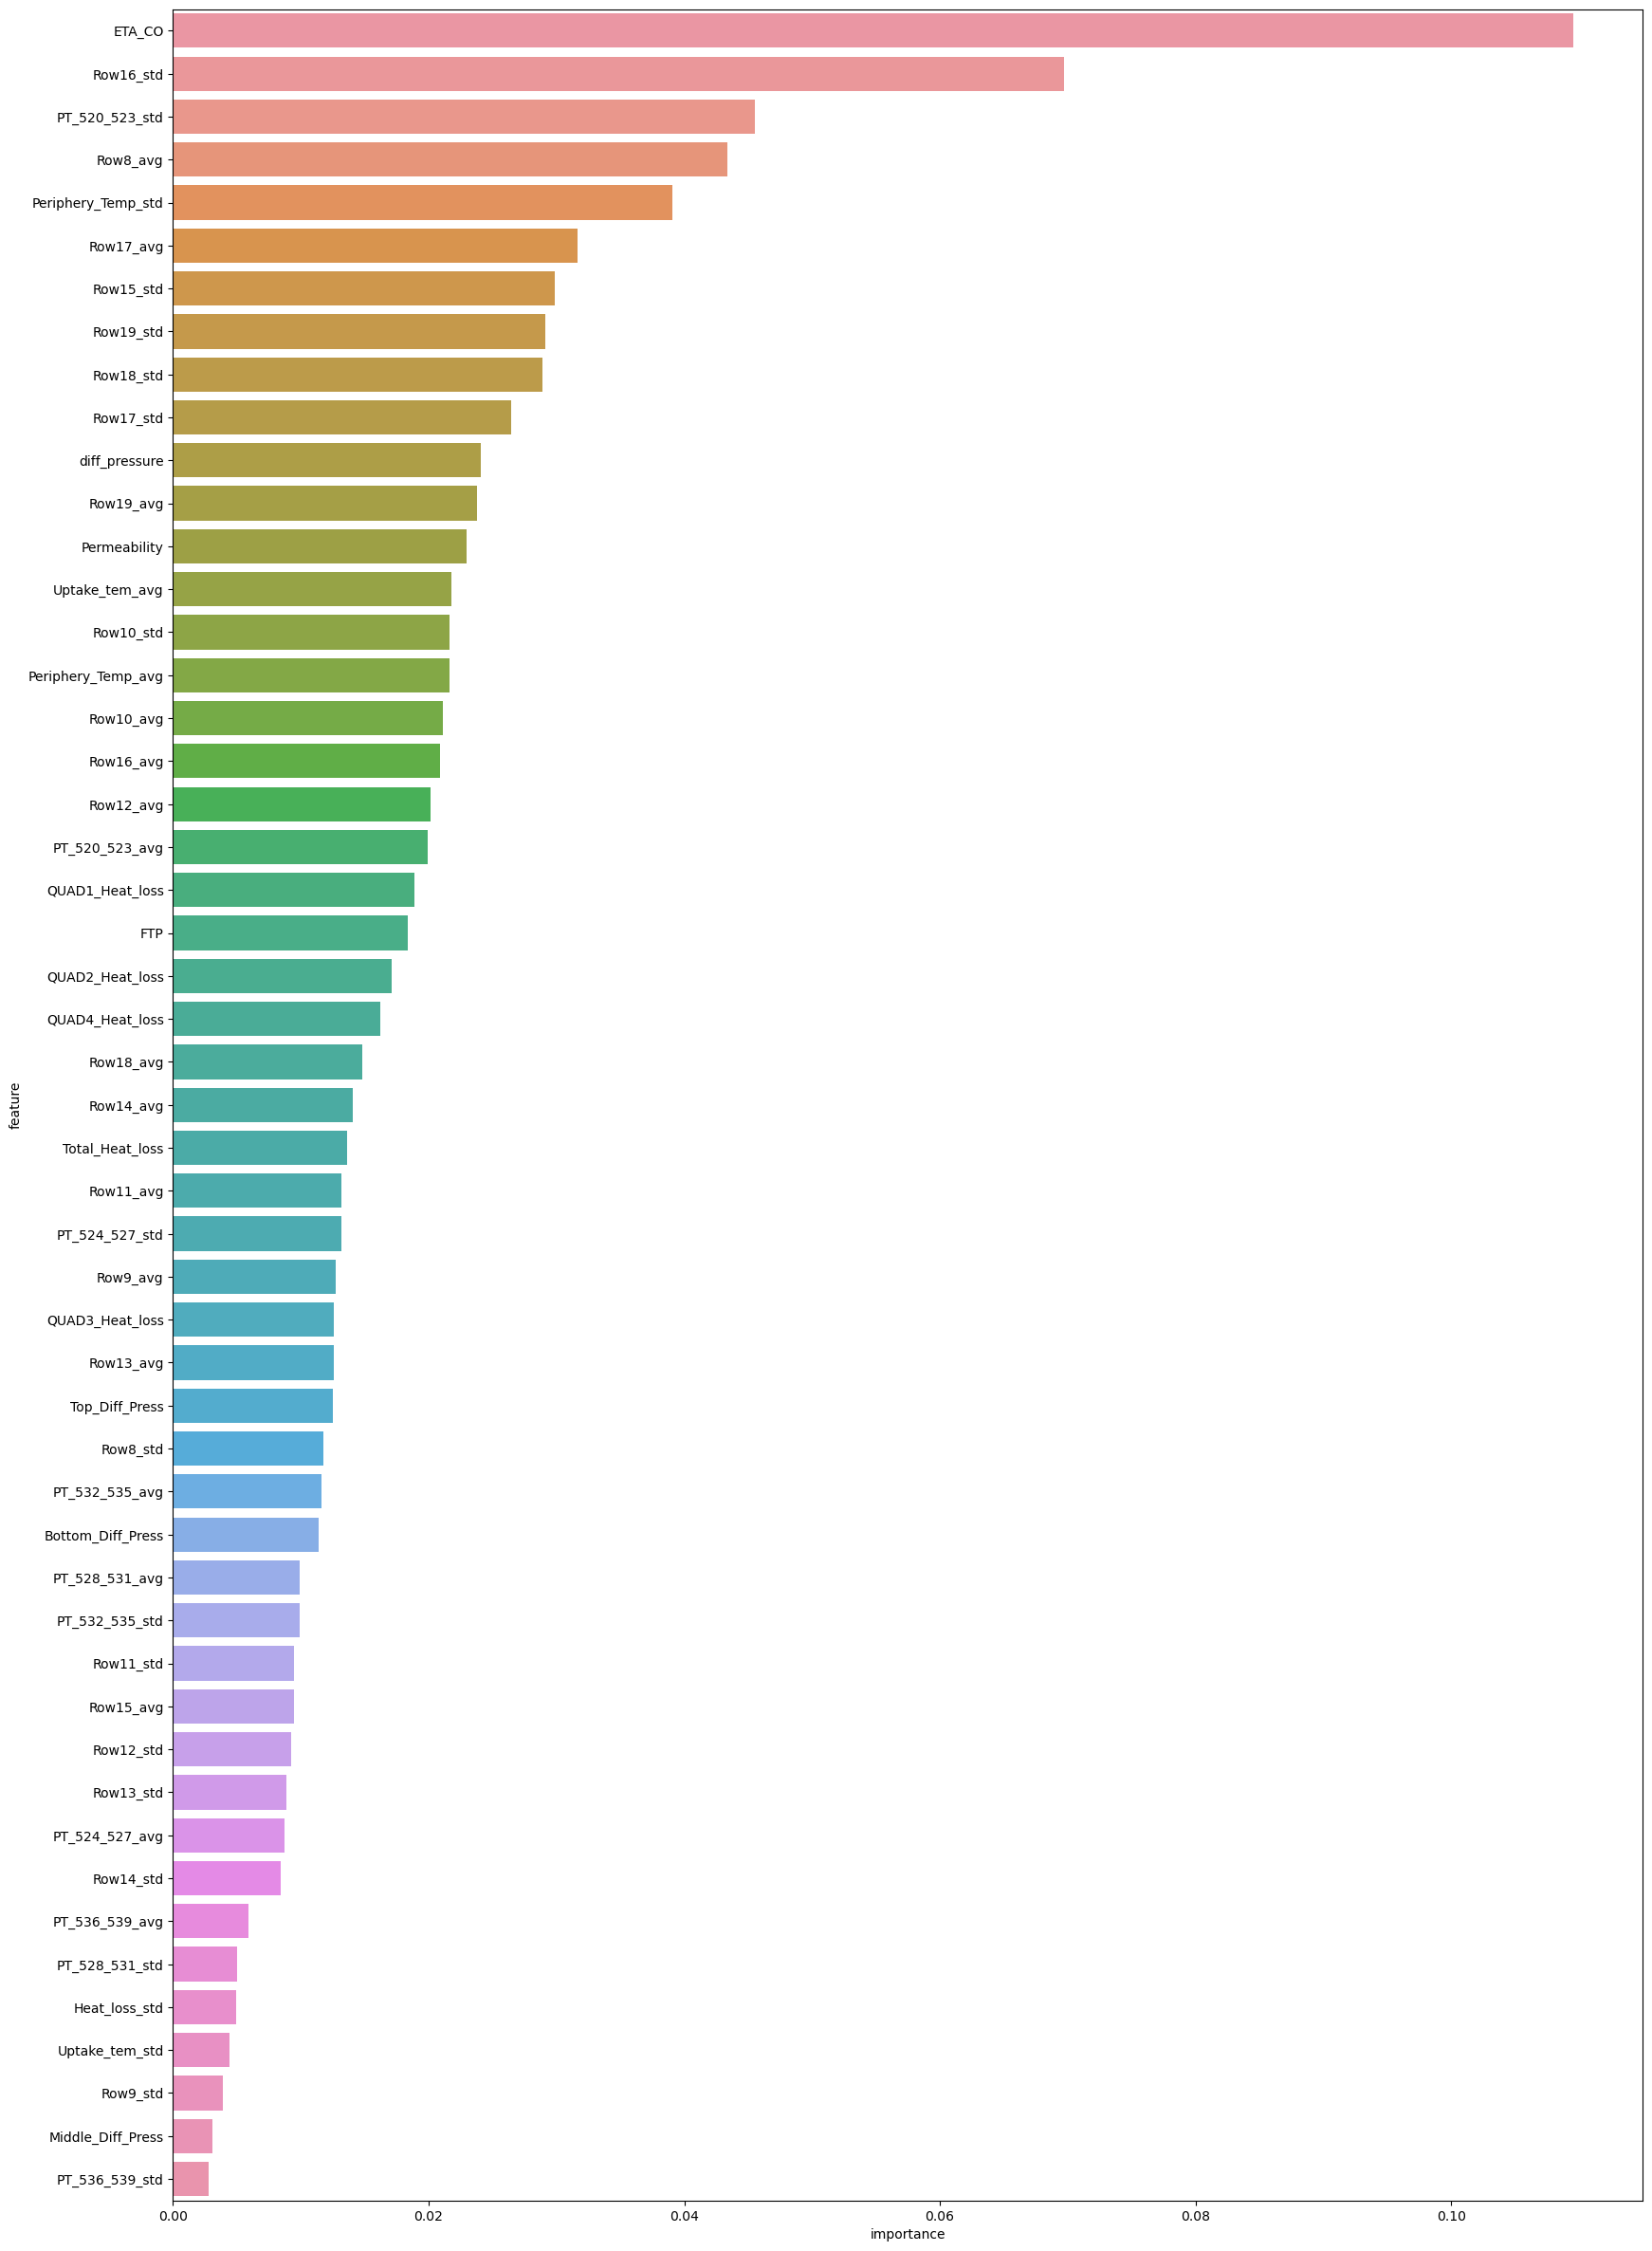

In [143]:
plt.figure(figsize=(20,30),dpi = 100)
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

# Tuning parameters

In [144]:
pargrid_ada = {'n_estimators': [70, 80, 90, 100],
                'max_features': [2,3,4],
              'max_depth': [2,3,4,5,6]}
gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1, scoring='roc_auc')

In [145]:
gscv_results = gscv_Rf.fit(train_X, train_y)
gscv_results.best_score_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


0.9786579327133011

In [146]:
gscv_results.best_params_

{'max_depth': 6, 'max_features': 4, 'n_estimators': 80}

sfvggashhh

gscv_results.predict(train_X)

In [147]:
#Train data - AUC Score
print(metrics.roc_auc_score(train_y, pd.DataFrame(gscv_results.predict_proba(train_X))[1]))

#Test data - AUC Score
print(metrics.roc_auc_score(test_y, pd.DataFrame(gscv_results.predict_proba(test_X))[1]))

0.9870562555896963
0.9793636905975435


In [148]:
xyz

NameError: name 'xyz' is not defined

In [145]:
from sklearn.ensemble import RandomForestClassifier

radm_clf_final = RandomForestClassifier(oob_score=True,n_estimators=80 , max_depth = 6, max_features=4, n_jobs=-1)
radm_clf_final.fit( train_X, train_y )

RandomForestClassifier(max_depth=6, max_features=4, n_estimators=80, n_jobs=-1,
                       oob_score=True)

In [153]:
 train_X.columns

Index(['Bottom_Diff_Press', 'ETA_CO', 'FTP', 'Heat_loss_std',
       'Middle_Diff_Press', 'PT_520_523_avg', 'PT_520_523_std',
       'PT_524_527_avg', 'PT_524_527_std', 'PT_528_531_avg', 'PT_528_531_std',
       'PT_532_535_avg', 'PT_532_535_std', 'PT_536_539_avg', 'PT_536_539_std',
       'Periphery_Temp_avg', 'Periphery_Temp_std', 'Permeability',
       'QUAD1_Heat_loss', 'QUAD2_Heat_loss', 'QUAD3_Heat_loss',
       'QUAD4_Heat_loss', 'Row10_avg', 'Row10_std', 'Row11_avg', 'Row11_std',
       'Row12_avg', 'Row12_std', 'Row13_avg', 'Row13_std', 'Row14_avg',
       'Row14_std', 'Row15_avg', 'Row15_std', 'Row16_avg', 'Row16_std',
       'Row17_avg', 'Row17_std', 'Row18_avg', 'Row18_std', 'Row19_avg',
       'Row19_std', 'Row8_avg', 'Row8_std', 'Row9_avg', 'Row9_std',
       'Top_Diff_Press', 'Total_Heat_loss', 'Uptake_tem_avg', 'Uptake_tem_std',
       'diff_pressure'],
      dtype='object')

In [ ]:
radm_clf.feature_importances_

In [ ]:
radm_clf.feature_importances_

indices = np.argsort(radm_clf.feature_importances_)[::-1]

In [ ]:
plt.figure(figsize=(20,30),dpi = 100)
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [ ]:
predict_train =radm_clf_final.predict(train_X)

In [ ]:
predict_test = radm_clf_final.predict(test_X)

In [ ]:
pd.crosstab(train_y,predict_train , margins = True)

In [ ]:
print(metrics.classification_report(train_y,radm_clf_final.predict(train_X)))

In [ ]:
pd.crosstab(test_y,predict_test , margins = True)

In [ ]:
print(metrics.classification_report(test_y,radm_clf_final.predict(test_X)))

In [ ]:
predictions = radm_clf_final.predict(test_X)

In [ ]:
probabilities = radm_clf_final.predict_proba(test_X)

In [ ]:
train_X.columns

In [ ]:
df3.columns

In [ ]:
probabilities = radm_clf_final.predict_proba(X)[:, 1]

# Create a new column 'Probability' in df3
df3['Probability'] = probabilities

# Display the updated DataFrame
print(df3)

# XG boost model probabilities

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

In [ ]:
xgb_classifier.fit(train_X, train_y)

In [ ]:
probabilities =xgb_classifier.predict_proba(X)[:, 1]

# Create a new column 'Probability' in df3
df3['XG_Probability'] = probabilities

# Display the updated DataFrame
print(df3)

In [ ]:
df3

# SVM probality


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
import numpy as np

In [ ]:
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
svm_classifier.fit(train_X, train_y)

In [ ]:
probabilities =svm_classifier.predict_proba(X)[:, 1]

# Create a new column 'Probability' in df3
df3['SVM_Probability'] = probabilities

# Display the updated DataFrame
print(df3)

In [ ]:
df3.columns

In [ ]:
df3 = df3['Date', 'Hot_Blast_Vol', 'Hot_Blast_Press'] 

In [ ]:
df3.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\Master data\XG_probability.xlsx')

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'Date' is your date column
df3['Date'] = pd.to_datetime(df3['Date'])

# Select the first 12 rows
df_subset = df.iloc[3100:3131, :]

# Define color ranges and corresponding colors
color_ranges = [(0, 0.27, 'green'), (0.27, 0.65, 'yellow'), (0.65, 1.0, 'red')]

# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Increase the figure size and axis visibility
plt.figure(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size


# Increase the figure size and axis visibility
fig, ax = plt.subplots(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
ax.fill_between(df_subset['Date'], df_subset['Probability'].min(), df_subset['Probability'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    ax.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
ax.plot(df_subset['Date'], df_subset['Probability'], marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='Probability')
# Highlight points where Probability exceeds 0.75
for index, row in df_subset.iterrows():
    if row['Probability'] > 0.657:
        ax.scatter(row['Date'], row['Probability'], c='red', marker='o', s=300)
    if row['Channelling'] == 1:
        ax.scatter(row['Date'], 0.9, c='blue', marker='D', s=300)  # y-value set to 0.9 for visibility
# Add a margin line at 0.154 probability
ax.axhline(y=0.154, color='black', linestyle='--', linewidth=2, label='Margin at 0.154 Probability')

ax.set_title('RF model Probability Over Time (Date:23-06-2018,Time:13.40 to 18.40 )', fontsize=40)
ax.set_xlabel('Date', fontsize=35)
ax.set_ylabel('Probability', fontsize=35)

# Format x-axis ticks to include both date and time stacked vertically
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.tick_params(axis='x', labelsize=15)  # Adjust the label size as needed
for label in ax.get_xticklabels():
     label.set_fontweight('bold')
plt.xticks(df_subset['Date'], rotation=0, fontsize=15)

# Set the desired y-axis scale
ax.set_yticks([0, 0.15, 0.27, 0.65, 1.0])
ax.set_yticklabels([0, 0.15, 0.27, 0.65, 1.0], fontsize=25)   # Modify the list based on your desired scale

ax.legend(fontsize=15)
plt.show()

# line graphs for the probability

In [ ]:
df = pd.read_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\Master data\XG_probability.xlsx')

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'])

# Select the first 12 rows
df_subset = df.iloc[3100:3131, :]

# Define color ranges and corresponding colors
color_ranges = [(0, 0.27, 'green'), (0.27, 0.65, 'yellow'), (0.65, 1.0, 'red')]

# Create a colormap based on the specified color ranges
colors = [color for _, _, color in color_ranges]
cmap = ListedColormap(colors)

# Increase the figure size and axis visibility
plt.figure(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size


# Increase the figure size and axis visibility
fig, ax = plt.subplots(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
ax.fill_between(df_subset['Date'], df_subset['Probability'].min(), df_subset['Probability'].max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color
for ymin, ymax, color in color_ranges:
    ax.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background
ax.plot(df_subset['Date'], df_subset['Probability'], marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='Probability')
# Highlight points where Probability exceeds 0.75
for index, row in df_subset.iterrows():
    if row['Probability'] > 0.657:
        ax.scatter(row['Date'], row['Probability'], c='red', marker='o', s=300)
    if row['Channelling'] == 1:
        ax.scatter(row['Date'], 0.9, c='blue', marker='D', s=300)  # y-value set to 0.9 for visibility
# Add a margin line at 0.154 probability
ax.axhline(y=0.154, color='black', linestyle='--', linewidth=2, label='Margin at 0.154 Probability')

ax.set_title('RF model Probability Over Time (Date:23-06-2018,Time:13.40 to 18.40 )', fontsize=40)
ax.set_xlabel('Date', fontsize=35)
ax.set_ylabel('Probability', fontsize=35)

# Format x-axis ticks to include both date and time stacked vertically
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.tick_params(axis='x', labelsize=15)  # Adjust the label size as needed
for label in ax.get_xticklabels():
     label.set_fontweight('bold')
plt.xticks(df_subset['Date'], rotation=0, fontsize=15)

# Set the desired y-axis scale
ax.set_yticks([0, 0.15, 0.27, 0.65, 1.0])
ax.set_yticklabels([0, 0.15, 0.27, 0.65, 1.0], fontsize=25)   # Modify the list based on your desired scale

ax.legend(fontsize=15)
plt.show()

In [ ]:
# Increase the figure size and axis visibility
fig, ax = plt.subplots(figsize=(40, 15))
plt.rcParams.update({'font.size': 20})  # Increase font size

# Fill background with gradient color
ax.fill_between(df_subset['Date'], df_subset[['Probability', 'SVM_Probability']].min().min(), df_subset[['Probability', 'SVM_Probability']].max().max(), color='gray', alpha=0.1)

# Fill specific ranges with gradient color for Probability
for ymin, ymax, color in color_ranges:
    ax.fill_between(df_subset['Date'], ymin, ymax, color=color, alpha=0.7)

# Plot the line graph over the filled background for Probability
ax.plot(df_subset['Date'], df_subset['Probability'], marker='o', markersize=15, linestyle='-', color='black', linewidth=5, label='RF Probability')

# Plot the line graph over the filled background for SVM_Probability
ax.plot(df_subset['Date'], df_subset['SVM_Probability'], marker='o', markersize=15, linestyle='-', color='blue', linewidth=5, label='SVM Probability')

# Highlight points where Probability exceeds 0.75 for RF Probability
for index, row in df_subset.iterrows():
    if row['Probability'] > 0.657:
        ax.scatter(row['Date'], row['Probability'], c='red', marker='o', s=300)
    if row['Channelling'] == 1:
        ax.scatter(row['Date'], 0.9, c='blue', marker='D', s=300)  # y-value set to 0.9 for visibility

# Highlight points where SVM Probability exceeds 0.75
for index, row in df_subset.iterrows():
    if row['SVM_Probability'] > 0.657:
        ax.scatter(row['Date'], row['SVM_Probability'], c='red', marker='o', s=300)
    # You might need to adjust the y-value for visibility
    if row['Channelling'] == 1:
        ax.scatter(row['Date'], 0.85, c='blue', marker='D', s=300)  # y-value set to 0.85 for visibility

# Add a margin line at 0.154 probability
ax.axhline(y=0.154, color='black', linestyle='--', linewidth=2, label='Margin at 0.154 Probability')

ax.set_title('RF and SVM model Probabilities Over Time (Date: 23-06-2018, Time: 13:40 to 18:40)', fontsize=40)
ax.set_xlabel('Date', fontsize=35)
ax.set_ylabel('Probability', fontsize=35)

# Format x-axis ticks to include both date and time stacked vertically
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.tick_params(axis='x', labelsize=15)  # Adjust the label size as needed
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Set the desired y-axis scale
ax.set_yticks([0, 0.15, 0.27, 0.65, 1.0])
ax.set_yticklabels([0, 0.15, 0.27, 0.65, 1.0], fontsize=25)   # Modify the list based on your desired scale

ax.legend(fontsize=15)
plt.show()

# Testing the model over OCT-2023_10 min

In [168]:

ss = pd.read_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\Master data\oct_2023_10min_filtered.xlsx' )

In [169]:
ss.shape

(4464, 61)

In [170]:
ss.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Unnamed: 0', 'Date', 'Cold_Blast_Volume', 'Blast_Volume', 'HBP', 'FTP',
       'diff_pressure', 'Permeability', 'Top_Diff_Press', 'Middle_Diff_Press',
       'Bottom_Diff_Press', 'ETA_CO', 'HM_PROD_RATE', 'QUAD1_Heat_loss',
       'QUAD2_Heat_loss', 'QUAD3_Heat_loss', 'QUAD4_Heat_loss',
       'Total_Heat_loss', 'Heat_loss_std', 'Periphery_Temp_avg',
       'Periphery_Temp_std', 'Uptake_tem_avg', 'Uptake_tem_std', 'Row8_avg',
       'Row8_std', 'Row9_avg', 'Row9_std', 'Row10_avg', 'Row10_std',
       'Row11_avg', 'Row11_std', 'Row12_avg', 'Row12_std', 'Row13_avg',
       'Row13_std', 'Row14_avg', 'Row14_std', 'Row15_avg', 'Row15_std',
       'Row16_avg', 'Row16_std', 'Row17_avg', 'Row17_std', 'Row18_avg',
       'Row18_std', 'Row19_avg', 'Row19_std', 'PT_520_523_avg',
       'PT_520_523_std', 'PT_524_527_avg', 'PT_524_527_std', 'PT_528_531_avg',
       'PT_528_531_std', 'PT_532_535_avg', 'PT_532_535_std', 'PT_536_539_avg',
       'PT_536_53

In [171]:
ss1 = ss[['Bottom_Diff_Press', 'ETA_CO', 'FTP', 'Heat_loss_std',
       'Middle_Diff_Press', 'PT_520_523_avg', 'PT_520_523_std',
       'PT_524_527_avg', 'PT_524_527_std', 'PT_528_531_avg', 'PT_528_531_std',
       'PT_532_535_avg', 'PT_532_535_std', 'PT_536_539_avg', 'PT_536_539_std',
       'Periphery_Temp_avg', 'Periphery_Temp_std', 'Permeability',
       'QUAD1_Heat_loss', 'QUAD2_Heat_loss', 'QUAD3_Heat_loss',
       'QUAD4_Heat_loss', 'Row10_avg', 'Row10_std', 'Row11_avg', 'Row11_std',
       'Row12_avg', 'Row12_std', 'Row13_avg', 'Row13_std', 'Row14_avg',
       'Row14_std', 'Row15_avg', 'Row15_std', 'Row16_avg', 'Row16_std',
       'Row17_avg', 'Row17_std', 'Row18_avg', 'Row18_std', 'Row19_avg',
       'Row19_std', 'Row8_avg', 'Row8_std', 'Row9_avg', 'Row9_std',
       'Top_Diff_Press', 'Total_Heat_loss', 'Uptake_tem_avg', 'Uptake_tem_std',
       'diff_pressure']]

In [172]:
mean_values = ss1.mean()
ss1.fillna(mean_values, inplace=True)

In [173]:
ss1.shape

(4464, 51)

In [174]:
channeling_predictions = radm_clf_final.predict(ss1)
channeling_probabilities = radm_clf_final.predict_proba(ss1)[:, 1]

In [175]:
ss1['Predicted_Channeling'] = channeling_predictions
ss1['Channeling_Probability'] = channeling_probabilities


In [176]:
ss1.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\OCT2023_10min_probablity_1.xlsx')

# Testing the model over jan-2024

In [ ]:
ss = pd.read_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\Master data\jan_2024_filtered.xlsx')

In [ ]:
ss1 = ss[['Bottom_Diff_Press', 'ETA_CO', 'FTP', 'Heat_loss_std',
       'Middle_Diff_Press', 'PT_520_523_avg', 'PT_520_523_std',
       'PT_524_527_avg', 'PT_524_527_std', 'PT_528_531_avg', 'PT_528_531_std',
       'PT_532_535_avg', 'PT_532_535_std', 'PT_536_539_avg', 'PT_536_539_std',
       'PT_Q1_std', 'PT_Q2_std', 'PT_Q3_std', 'PT_Q4_std',
       'Periphery_Temp_avg', 'Periphery_Temp_std', 'Permeability',
       'QUAD1_Heat_loss', 'QUAD2_Heat_loss', 'QUAD3_Heat_loss',
       'QUAD4_Heat_loss', 'Row10_avg', 'Row10_std', 'Row11_avg', 'Row11_std',
       'Row12_avg', 'Row12_std', 'Row13_avg', 'Row13_std', 'Row14_avg',
       'Row14_std', 'Row15_avg', 'Row15_std', 'Row16_avg', 'Row16_std',
       'Row17_avg', 'Row17_std', 'Row18_avg', 'Row18_std', 'Row19_avg',
       'Row19_std', 'Row8_avg', 'Row8_std', 'Row9_avg', 'Row9_std',
       'Top_Diff_Press', 'Total_Heat_loss', 'Uptake_tem_avg', 'Uptake_tem_std',
       'diff_pressure']]

In [ ]:
channeling_predictions = radm_clf_final.predict(ss1)
channeling_probabilities = radm_clf_final.predict_proba(ss1)[:, 1]

In [ ]:
ss1['Predicted_Channeling'] = channeling_predictions
ss1['Channeling_Probability'] = channeling_probabilities


In [ ]:
ss1.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\jan2024_probablity_1.xlsx')

# Testing over the 1hour data

In [ ]:
df3.columns

In [ ]:
df4 = pd.read_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\Master data\masterdata(1hour)_3.xlsx')

In [ ]:
df4.isnull().count()

In [ ]:
df4.fillna(df4.mean(), inplace=True)

In [ ]:
df4.shape

In [ ]:
df4.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\filter_data2.xlsx')

In [ ]:
df4.columns

In [ ]:
train_X.columns

In [ ]:
ss3 = df4[['Bottom_Diff_Press', 'ETA_CO', 'FTP', 'Heat_loss_std',
       'Middle_Diff_Press', 'PT_520_523_avg', 'PT_520_523_std',
       'PT_524_527_avg', 'PT_524_527_std', 'PT_528_531_avg', 'PT_528_531_std',
       'PT_532_535_avg', 'PT_532_535_std', 'PT_536_539_avg', 'PT_536_539_std',
       'PT_Q1_std', 'PT_Q2_std', 'PT_Q3_std', 'PT_Q4_std',
       'Periphery_Temp_avg', 'Periphery_Temp_std', 'Permeability',
       'QUAD1_Heat_loss', 'QUAD2_Heat_loss', 'QUAD3_Heat_loss',
       'QUAD4_Heat_loss', 'Row10_avg', 'Row10_std', 'Row11_avg', 'Row11_std',
       'Row12_avg', 'Row12_std', 'Row13_avg', 'Row13_std', 'Row14_avg',
       'Row14_std', 'Row15_avg', 'Row15_std', 'Row16_avg', 'Row16_std',
       'Row17_avg', 'Row17_std', 'Row18_avg', 'Row18_std', 'Row19_avg',
       'Row19_std', 'Row8_avg', 'Row8_std', 'Row9_avg', 'Row9_std',
       'Top_Diff_Press', 'Total_Heat_loss', 'Uptake_tem_avg', 'Uptake_tem_std',
       'diff_pressure'
       ]]

In [ ]:
channeling_predictions = radm_clf_final.predict(ss3)
channeling_probabilities = radm_clf_final.predict_proba(ss3)[:, 1]

In [ ]:
ss3['Predicted_Channeling'] = channeling_predictions
ss3['Channeling_Probability'] = channeling_probabilities


In [ ]:
ss3.shape

In [ ]:
ss3.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\1hour_probablity_1.xlsx')

In [ ]:
# Assuming you have your new test dataset 'ss1'
probabilities_ss1 = radm_clf_final.predict_proba(ss1)[:, 1]

# Create a new column 'Probability' in ss1
ss1['Probability'] = probabilities_ss1

# Display the updated DataFrame
print(ss1)

In [ ]:
asdhHWHGHHH

# Logistic regression 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# sklearn needs x and y to be separated in different dataframes
Y = df3.Channelling
X = df3[df3.columns.difference(['Channelling'])]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,Y, test_size = 0.3, random_state = 42)
train_X

In [ ]:
train, test = train_test_split(df3, test_size=0.3, random_state=123)

In [ ]:
df

In [ ]:
ds = df[['Date', 'FTP', 'diff_pressure',  'PT_520_523_avg',  'Total_Heat_loss',  'ETA_CO', 'Periphery_Temp_avg', 'Periphery_Temp_std', 'Row8_avg','Row15_std', 'Row16_std', 'Row17_avg'  ,'Row18_std' ,'Uptake_tem_avg']]

In [ ]:
ds.to_excel(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\impfeatures.xlsx')

In [ ]:
model = smf.logit('Channelling ~  FTP + diff_pressure + PT_520_523_avg + Total_Heat_loss  + ETA_CO   + Periphery_Temp_avg + Periphery_Temp_std + Row8_avg  + Row15_std + Row16_std + Row17_avg  + Row18_std + Uptake_tem_avg ' , data=train).fit()

In [ ]:
print(model.summary())

In [ ]:
#df1 = df[['Channelling','Hot_Blast_Vol','Hot_Blast_Press','FTP','diff_pressure','Permeability','Top_Diff_Press','Middle_Diff_Press','Bottom_Diff_Press','ETA_CO','HM_PROD_RATE','QUAD1_Heat_loss','QUAD2_Heat_loss','QUAD3_Heat_loss','QUAD4_Heat_loss','Total_Heat_loss','Heat_loss_std', 'Periphery_Temp_avg' ,'Periphery_Temp_std','Uptake_tem_avg','Uptake_tem_std', 'Row8_avg','Row8_std','Row9_avg','Row9_std','Row10_avg','Row10_std','Row11_avg','Row11_std','Row11_avg','Row11_std' ,'Row12_avg','Row13_std','Row14_avg','Row14_std','Row15_avg','Row15_std','Row16_avg','Row16_std','Row17_avg','Row17_std','Row18_avg','Row18_std','Row19_avg','Row19_std','PT_520_523_avg','PT_520_523_std','PT_524_527_avg','PT_524_527_std','PT_528_531_avg','PT_528_531_std','PT_532_535_avg','PT_532_535_std','PT_536_539_avg','PT_536_539_std','PT_Q1_std','PT_Q2_std','PT_Q3_std','PT_Q4_std']]

# To calculate the impact of individual features on your output variable and create a mathematical equation for prediction using random forest model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_depth = 15, max_features=10, n_jobs=-1)
radm_clf.fit( train_X, train_y )

In [ ]:
importances = radm_clf.feature_importances_

In [ ]:
feature_ranking = sorted(zip(importances, df3), reverse=True)

In [ ]:
top_features = [feature for importance, feature in feature_ranking[:13]]

In [ ]:
from sklearn.linear_model import LinearRegression

X_top_features = df3[top_features] 
y = df3['Channelling']

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_top_features, y)

coefficients = linear_reg_model.coef_
intercept = linear_reg_model.intercept_

In [ ]:
equation = f"Output = {intercept:.4f} + "
for feature, coefficient in zip(top_features, coefficients):
    equation += f"{coefficient:.4f} * {feature} + "

equation = equation[:-2] 

In [ ]:
df3.shape

In [ ]:
equation

In [ ]:
import numpy as np

# List of feature names
feature_names = ['FTP', 'Row18_std', 'Row9_avg', 'Bottom_Diff_Press', 'PT_528_531_avg', 'PT_520_523_std', 'PT_524_527_std', 
                  'Row17_std', 'Row19_avg', 'PT_524_527_avg', 'Row11_std', 'Row8_std', 'Row19_std']

# Coefficients from your equation
coefficients = np.array([-0.3081, 3.1577, 0.0166, -0.0168, -0.5521, 0.7312, 2.1297, 0.9272, -0.0053, -0.0029, -3.4702, 0.0107, 0.0262, 0.0168])

# Get the features from df3
df3_features = df3[feature_names]

# Calculate the linear combination for each row
linear_combinations = df3_features.dot(coefficients[1:]) + coefficients[0]

# Apply the sigmoid function
df3['Sigmoid_Probability_New'] = 1 / (1 + np.exp(-linear_combinations))

# Save the DataFrame to a file
df3.to_csv(r'C:\Users\suraj musale\OneDrive\Desktop\BF data\df3_with_sigmoid_probability_new.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming X_train and y_train are your training data and labels

# Define different hyperparameter values
n_estimators_values = [100, 200, 300]
max_depth_values = [None, 10, 20,30]

best_features = None
best_importance = 0.0

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Create and train the model
        radm_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        radm_clf.fit(train_X,train_y)

        # Retrieve feature importances
        importances = radm_clf.feature_importances_

        # Sort features based on importance
        sorted_indices = np.argsort(importances)[::-1]

        # Select top features (e.g., top 5)
        top_features = train_X.columns[sorted_indices[:5]]
        
        # Display or store the results
        print(f"Hyperparameters: n_estimators={n_estimators}, max_depth={max_depth}")
        print("Top Features:", top_features)
        print("Feature Importances:", importances[sorted_indices[:5]])

        # Update if these features have higher importance
        if importances[sorted_indices[0]] > best_importance:
            best_features = top_features
            best_importance = importances[sorted_indices[0]]

print("Best Features:", best_features)
print("Best Importance:", best_importance)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming X_train and y_train are your training data and labels

# Define different hyperparameter values
n_estimators_values = [100, 200, 300]
max_depth_values = [None, 10, 20]

best_features = None
best_importance = 0.0

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Create and train the model
        radm_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        radm_clf.fit(train_X,train_y)

        # Retrieve feature importances
        importances = radm_clf.feature_importances_

        # Sort features based on importance
        sorted_indices = np.argsort(importances)[::-1]

        # Select top features (e.g., top 5)
        top_features =train_X.columns[sorted_indices[:5]]
        
        # Display or store the results
        print(f"Hyperparameters: n_estimators={n_estimators}, max_depth={max_depth}")
        print("Top Features:", top_features)
        print("Feature Importances (Relative Coefficients):", importances[sorted_indices[:5]])

        # Update if these features have higher importance
        if importances[sorted_indices[0]] > best_importance:
            best_features = top_features
            best_importance = importances[sorted_indices[0]]

print("Best Features:", best_features)
print("Best Importance:", best_importance)